# Предсказание цены на подержанный автомобиль

####### Вопрос назначения цены становится актуальным, когда человек хочет продать свой автомобиль. Какую цену ставить в объявлении? Для этого нужно потратить существенное время, чтобы изучить похожие объявления на разных интернет-площадках.
Объявлений огромное количество, можно легко упустить что-то из виду, продешевить или наоборот, поставить завышенную цену 
и тем самым не привлечь потенциальных покупателей.
Мы исследуем рынок подержанных авто на примере автомобиля Kia Rio (я являюсь владельцем такого авто, и мне интересно предсказать его цену) и построим предиктивную модель.

In [1]:
# осуществим парсинг трех сайтов с объявлениями о продаже подержанных автомобилей
# сайты auto.ru, drom.ru и avito.ru

# в данном ноутбуке коды парсеров не приведены

In [2]:
import numpy as np
import pandas as pd

In [3]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set.xls', index_col=None, header=None)

In [4]:
auto_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,передний,Левый,Не требует ремонта,3 или более,Оригинал,Растаможен,None,Старая Купавна,350000,https://auto.ru/cars/used/sale/kia/rio/1101242...
4,Kia Rio IV Рестайлинг,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Комплектация Luxe,Тверь,от 846810,https://auto.ru/cars/new/group/kia/rio/2250075...


In [5]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                        'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type', 
                        'region', 'price', 'link' ]

In [6]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,drive,wheel,condition,owners_count,passport,customs,complectation_type,region,price,link
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,передний,Левый,Не требует ремонта,3 или более,Оригинал,Растаможен,None,Старая Купавна,350000,https://auto.ru/cars/used/sale/kia/rio/1101242...
4,Kia Rio IV Рестайлинг,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Комплектация Luxe,Тверь,от 846810,https://auto.ru/cars/new/group/kia/rio/2250075...


In [7]:
auto_data.shape

(1221, 19)

In [8]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model               1221 non-null   object
 1   year                1221 non-null   object
 2   km_age              1221 non-null   object
 3   body_type           1221 non-null   object
 4   color               1221 non-null   object
 5   engine_volume       1221 non-null   object
 6   engine_power        1221 non-null   object
 7   fuel_type           1221 non-null   object
 8   transmission        1221 non-null   object
 9   drive               1221 non-null   object
 10  wheel               1221 non-null   object
 11  condition           1221 non-null   object
 12  owners_count        1221 non-null   object
 13  passport            1221 non-null   object
 14  customs             1221 non-null   object
 15  complectation_type  1221 non-null   object
 16  region              1221

In [9]:
# Уберем предложения от дилеров (новые машины) и оставим только подержанные

auto_data = auto_data.loc[auto_data['year'] != 'None']

In [10]:
auto_data.shape

(1064, 19)

In [11]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [12]:
# Посмотри на уникальные значения типа привода('drive')

auto_data['drive'].unique()

array(['передний'], dtype=object)

In [13]:
# Столбец drive (тип привода) имеет лишь одно уникальное значение "передний", так что его тоже удалим

auto_data.drop(['drive'], axis='columns', inplace=True)

In [14]:
# Посмотрим на расположение руля

auto_data['wheel'].unique()

array(['Левый'], dtype=object)

In [15]:
# Также удалим столбец wheel, т.к.расположение руля у всех автомобилей левое

auto_data.drop(['wheel'], axis='columns', inplace=True)

In [16]:
# Взглянем на сведения о таможне

auto_data['customs'].unique()

array(['Растаможен'], dtype=object)

In [17]:
# Все автомобили растаможены, так что столбец customs можно тоже удалить

auto_data.drop(['customs'], axis='columns', inplace=True)

In [18]:
# Посмотрим уникальные значения столбца о состоянии автомобиля

auto_data['condition'].unique()

array(['Не требует ремонта'], dtype=object)

In [19]:
# Все автомобили не требуют ремонта, удаляем столбец condition

auto_data.drop(['condition'], axis='columns', inplace=True)

In [20]:
# Уникальные значения регионов

auto_data['region'].unique()

array(['Москва', 'Тула', 'Калуга', 'Старая Купавна', 'Тверь', 'Балашиха',
       'Обнинск', 'Рязань', 'Химки', 'Реутов', 'Подольск', 'Коломна',
       'Ярославль', 'Королёв', 'Электросталь', 'Голицыно', 'Иваново',
       'Зеленоград', 'Красногорск', 'Чехов', 'Павловский Посад',
       'Серпухов', 'Собинка', 'Мытищи', 'Карабаново', 'Жуковский',
       'Люберцы', 'Щелково', 'Нахабино', 'Кохма', 'Владимир', 'Клин',
       'Сергиев Посад', 'Белоусово', 'Орехово-Зуево', 'Конаково',
       'Ступино', 'Московский', 'Бронницы', 'Медынь', 'Лосино-Петровский',
       'Малоярославец', 'Ивантеевка', 'Горки', 'Железнодорожный',
       'Воскресенск', 'Ногинск', 'Киржач', 'Дубна', 'Александров',
       'Домодедово', 'Истра', 'Козельск', 'Переславль-Залесский',
       'Лыткарино', 'Малаховка', 'Протвино', 'Егорьевск', 'Куровское',
       'Раменское', 'Кольчугино', 'Удельная', 'Лихославль', 'Камешково',
       'Новый Городок', 'Кабицыно', 'Ковров', 'Ликино-Дулево', 'Пушкино',
       'Дмитров', 'Новопет

In [21]:
# Цены у официальных дилеров одинаковые по стране, поэтому предположим, что владельцы в различных регионах продают
# автомобили ориентируясь на весь общий рынок. Часто покупатель едет за автомобилем в другой регион. Удалим столбец region

auto_data.drop(['region'], axis='columns', inplace=True)

In [22]:
# Посмотрим на различные модификации Kia Rio

auto_data['model'].unique()

array(['Kia Rio IV', 'Kia Rio III Рестайлинг', 'Kia Rio III',
       'Kia Rio  III 4-speed', 'Kia Rio IV X-Line',
       'Kia Rio  III 5-speed', 'Kia Rio I Рестайлинг',
       'Kia Rio II Рестайлинг', 'Kia Rio  III 6-speed', 'Kia Rio II',
       'Kia Rio  I Рестайлинг', 'Kia Rio I', 'Kia Rio  IV',
       'Kia Rio  III Рестайлинг'], dtype=object)

In [23]:
# Количество различных моделей

len(auto_data['model'].unique())

14

In [24]:
# Можно заметить, что некоторые модели повторяются, просто между названием Kia Rio и поколением разное количество пробелов:
# где-то один пробел, а где-то два

In [25]:
# заменим в названиях моделей два пробела подряд одним пробелом, например 'Kia Rio  III' сделаем 'Kia Rio III',
# чтобы уменьшить число категорий признака 'model'

auto_data['model'] = auto_data['model'].str.replace('  ',' ')

In [26]:
# Получилось 11 различных моделей

len(auto_data['model'].unique())

11

In [27]:
# Заменим модели 'Kia Rio III 4-speed', 'Kia Rio III 5-speed', 'Kia Rio III 6-speed' на модель 'Kia Rio III'
# т.к. в данных с других сайтов данная градация отсутствует (мы увидим это позже)

In [28]:
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 4-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 5-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 6-speed','Kia Rio III')

In [29]:
auto_data['model'].unique()

array(['Kia Rio IV', 'Kia Rio III Рестайлинг', 'Kia Rio III',
       'Kia Rio IV X-Line', 'Kia Rio I Рестайлинг',
       'Kia Rio II Рестайлинг', 'Kia Rio II', 'Kia Rio I'], dtype=object)

In [30]:
# Уникальные значения столбца с типом комплектации

auto_data['complectation_type'].unique()

array(['Комплектация', 'None', 'Комплектация Prestige AV',
       'Комплектация Comfort Аудио', 'Комплектация Prestige',
       'Комплектация Luxe', 'Комплектация Comfort', 'Комплектация Люкс',
       'Комплектация Luxe FCC', 'Комплектация Luxe RED Line',
       'Комплектация Лига Европы', 'Комплектация Classic',
       'Комплектация Comfort Кондиционер', 'Комплектация Premium',
       'Комплектация Комфорт', 'Комплектация Comfort (без теплых опций)',
       'Комплектация Premium Navi', 'Комплектация Classic Audio',
       'Комплектация Стандарт', 'Комплектация Luxe 2018 FWC'],
      dtype=object)

In [31]:
# Посмотрим количество строк, где тип комплектации отсутствует либо просто стоит одно слово 'Комплектация'

auto_data.loc[(auto_data['complectation_type'] == 'None') | (auto_data['complectation_type'] == 'Комплектация')].shape

(802, 13)

In [32]:
auto_data.shape

(1064, 13)

In [33]:
802 / 1064

0.7537593984962406

In [34]:
# В столбце complectation_type отсутствует почти 75% данных. Его тоже удаляем

auto_data.drop(['complectation_type'], axis='columns', inplace=True)

In [35]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,1.4,107,Бензин,механическая,2 владельца,Оригинал,410000


In [36]:
# Уникальные значения сведений о ПТС

auto_data['passport'].unique()

array(['Оригинал', 'Дубликат'], dtype=object)

In [37]:
auto_data.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    992
Name: model, dtype: int64

In [38]:
# Различные типы кузова

auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [39]:
# позиции, где не указана цена

auto_data.loc[auto_data['price'] == 'None']

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,price
965,Kia Rio III Рестайлинг,2016,89000,хэтчбек 5 дв.,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,None


In [40]:
# оставим только те данные, где указана цена, т.к. цена является целевым признаком
# Если цена отсутствует - автомобиль уже продан

auto_data = auto_data.loc[auto_data['price'] != 'None']

In [41]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')
auto_data['engine_volume'] = auto_data['engine_volume'].astype('float')

In [42]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1220
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          1063 non-null   object 
 1   year           1063 non-null   int32  
 2   km_age         1063 non-null   int32  
 3   body_type      1063 non-null   object 
 4   color          1063 non-null   object 
 5   engine_volume  1063 non-null   float64
 6   engine_power   1063 non-null   int32  
 7   fuel_type      1063 non-null   object 
 8   transmission   1063 non-null   object 
 9   owners_count   1063 non-null   object 
 10  passport       1063 non-null   object 
 11  price          1063 non-null   int32  
dtypes: float64(1), int32(4), object(7)
memory usage: 91.4+ KB


## Распределение целевого признака (цены)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew


 mu = 578666.26 and sigma = 208161.32



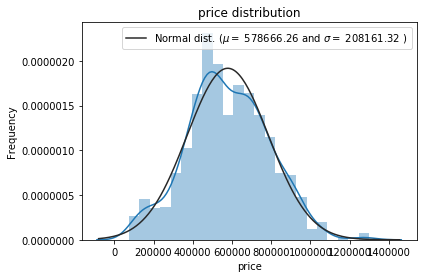

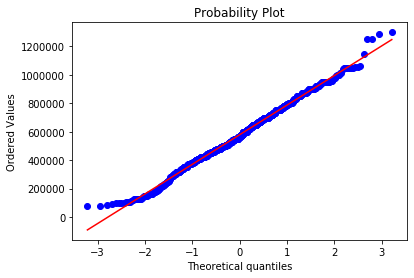

In [54]:
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [44]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.076603
Kurtosis: -0.072519


In [55]:
# распределение цены близко к нормальному
# условие гомоскедастичности соблюдается

In [56]:
# посмотрим на уникальные значения цветов

auto_data['color'].unique()

array(['белый', 'чёрный', 'серый', 'зелёный', 'бежевый', 'коричневый',
       'серебристый', 'красный', 'оранжевый', 'голубой', 'синий',
       'золотистый', 'жёлтый', 'фиолетовый'], dtype=object)

In [57]:
len(auto_data['color'].unique())

14

In [58]:
# Уникальные значения объемов двигателя

auto_data['engine_volume'].unique()

array([1.6, 1.4, 1.5, 1.3])

In [59]:
# Уникальные значения мощностей двигателя

auto_data['engine_power'].unique()

array([123, 107, 100,  97,  98,  95, 112,  75, 105,  84, 108])

In [60]:
# Уникальные значения типа топлива

auto_data['fuel_type'].unique()

array([' Бензин', ' Бензин, газобаллонное оборудование'], dtype=object)

In [61]:
auto_data['fuel_type'] = auto_data['fuel_type'].str.replace('газобаллонное оборудование','ГБО')

In [62]:
auto_data['fuel_type'].unique()

array([' Бензин', ' Бензин, ГБО'], dtype=object)

In [63]:
# Уникальные значения по количеству владельцев

auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [64]:
auto_data.groupby(['year', 'owners_count'])['price', 'km_age'].mean()

C:\Users\user1174\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price         km_age
year owners_count                              
2000 3 или более    85000.000000  190002.000000
2001 1 владелец     75000.000000  207000.000000
     3 или более    99999.666667  195333.333333
2002 3 или более   133888.777778  198050.000000
2003 1 владелец    149000.000000  230000.000000
     2 владельца   207500.000000  200000.000000
     3 или более   149888.888889  226405.222222
2004 2 владельца   175800.000000  172946.800000
     3 или более   158500.000000  197132.100000
2005 2 владельца   180833.333333  210260.000000
     3 или более   181272.727273  223945.909091
2006 1 владелец    262500.000000  155981.500000
     2 владельца   345000.000000  110000.000000
     3 или более   251571.285714  207160.714286
2007 3 или более   254250.000000  196467.250000
2009 1 владелец    361000.000000  152540.333333
     2 владельца   338671.428571  129719.285714
     3 или более   281111.111111  148500.000000
2010 1 владелец    350340.000000  135773.100000
     2 владельца   372222.222222  117564.555556
     3 или более   337384.615385  157017.153846
2011 1 владелец    415240.000000  129161.400000
     2 владельца   408595.600000  127148.150000
     3 или более   378000.000000  139140.000000
2012 1 владелец    503391.304348  113063.956522
     2 владельца   459892.857143  143219.214286
     3 или более   423095.238095  164480.523810
2013 1 владелец    499095.904762  147495.190476
     2 владельца   472319.758621  130070.172414
     3 или более   449461.538462  145431.692308
2014 1 владелец    531910.975610  105706.365854
     2 владельца   510555.250000  123772.000000
     3 или более   421333.333333  160487.666667
2015 1 владелец    600500.250000   90990.076923
     2 владельца   542934.760870  114460.239130
     3 или более   511461.538462  151831.307692
2016 1 владелец    630936.340659   95387.186813
     2 владельца   588684.782609  108442.673913
     3 или более   515357.142857  139256.428571
2017 1 владелец    726874.659091   68553.984848
     2 владельца   705024.365854   69642.292683
     3 или более   627487.500000   68557.875000
2018 1 владелец    836963.963964   49294.243243
     2 владельца   780363.636364   58019.909091
     3 или более   929000.000000   23450.000000
2019 1 владелец    949773.600000   22305.525000
     2 владельца   927500.000000   41750.000000
2020 1 владелец    900000.000000   20000.000000

In [65]:
# сгруппируем по модельному ряду и посмотрим среднюю цену

auto_data.groupby('model')['price'].mean()

model
Kia Rio I                 118928.428571
Kia Rio I Рестайлинг      167731.707317
Kia Rio II                274951.814815
Kia Rio II Рестайлинг     357171.428571
Kia Rio III               479681.907534
Kia Rio III Рестайлинг    612702.659574
Kia Rio IV                798263.054054
Kia Rio IV X-Line         931360.074074
Name: price, dtype: float64

In [66]:
# сгруппируем по году выпуска и посмотрим среднюю цену

auto_data.groupby('year')['price'].mean()

year
2000     85000.000000
2001     93749.750000
2002    133888.777778
2003    159416.666667
2004    164266.666667
2005    181117.647059
2006    270545.363636
2007    254250.000000
2009    314931.578947
2010    355839.024390
2011    400611.866667
2012    463055.555556
2013    471898.513158
2014    505296.795455
2015    560475.903226
2016    607349.052980
2017    717532.342541
2018    828358.208955
2019    948712.952381
2020    900000.000000
Name: price, dtype: float64

In [67]:
auto_data.groupby(['year', 'passport'])['price'].mean()

year  passport
2000  Оригинал     85000.000000
2001  Дубликат    100000.000000
      Оригинал     91666.333333
2002  Дубликат    167500.000000
      Оригинал    124285.571429
2003  Дубликат    111250.000000
      Оригинал    183500.000000
2004  Дубликат    166000.000000
      Оригинал    163636.363636
2005  Дубликат    183333.333333
      Оригинал    180642.857143
2006  Дубликат    231750.000000
      Оригинал    292714.142857
2007  Дубликат    268500.000000
      Оригинал    240000.000000
2009  Дубликат    249000.000000
      Оригинал    318594.444444
2010  Дубликат    308400.000000
      Оригинал    362427.777778
2011  Дубликат    345000.000000
      Оригинал    407956.830189
2012  Дубликат    443500.000000
      Оригинал    465500.000000
2013  Дубликат    482250.000000
      Оригинал    470680.691176
2014  Дубликат    435000.000000
      Оригинал    509531.542169
2015  Дубликат    560000.000000
      Оригинал    560508.724138
2016  Дубликат    550000.000000
      Оригинал    609722.

## Графики

In [68]:
import matplotlib as mpl

In [69]:
df = auto_data

In [70]:
# Построим Box Plot по годам выпуска

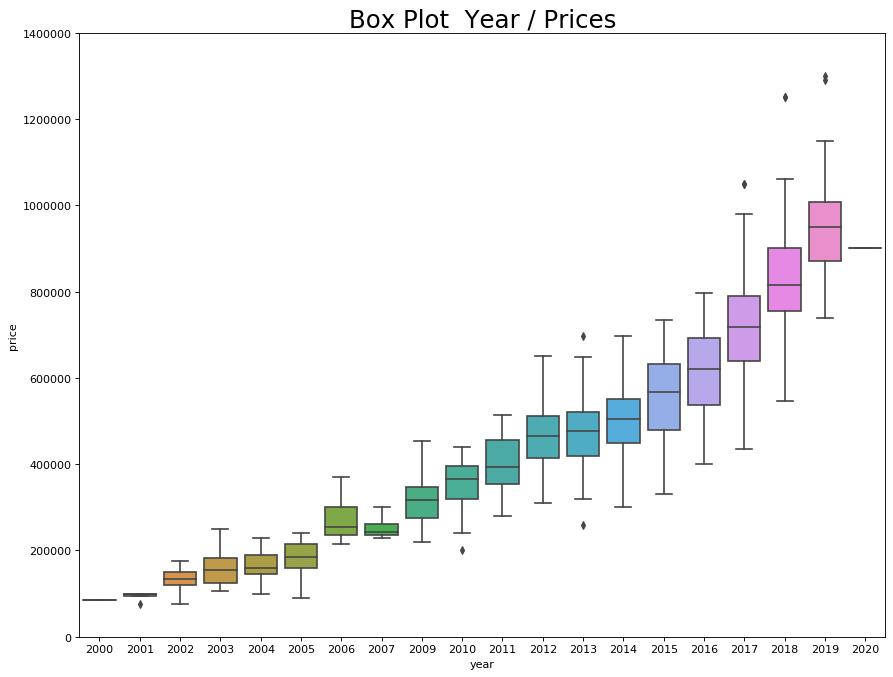

In [71]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [72]:
# На графике присутствуют "выбросы" по цене

In [73]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

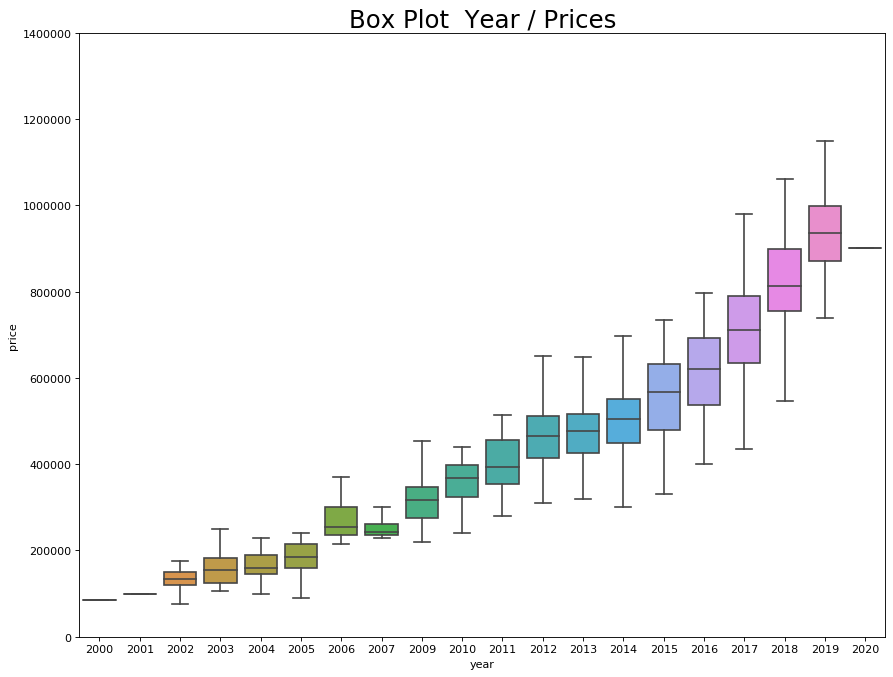

In [74]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [75]:
# как видно из графика, выбросы исчезли

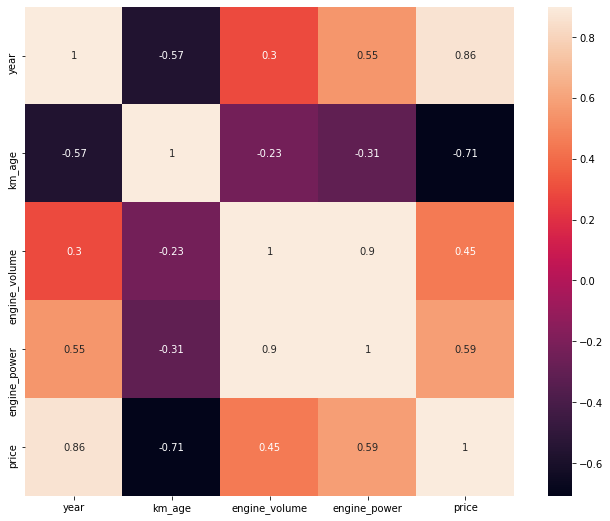

In [76]:
# посмотрим на матрицу корреляций

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [77]:
# На матрице корреляций можно увидеть, что признаки 'engine_volume' и 'engine_power' сильно коррелируют между собой
# действительно, между ними прямая взаимосвязь, чем больше объем двигателя, тем больше мощность.
# удалим 'engine_volume', т.к. при одинаковых объемах двигателя может быть различная мощность у разных поколений автомобилей

In [78]:
df.drop(['engine_volume'], axis='columns', inplace=True)

In [79]:
df.head()

,model,year,km_age,body_type,color,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,107,Бензин,механическая,2 владельца,Оригинал,410000


In [80]:
# Посмотрим на столбчатую диаграмму средней цены по годам в зависимости от количества владельцев

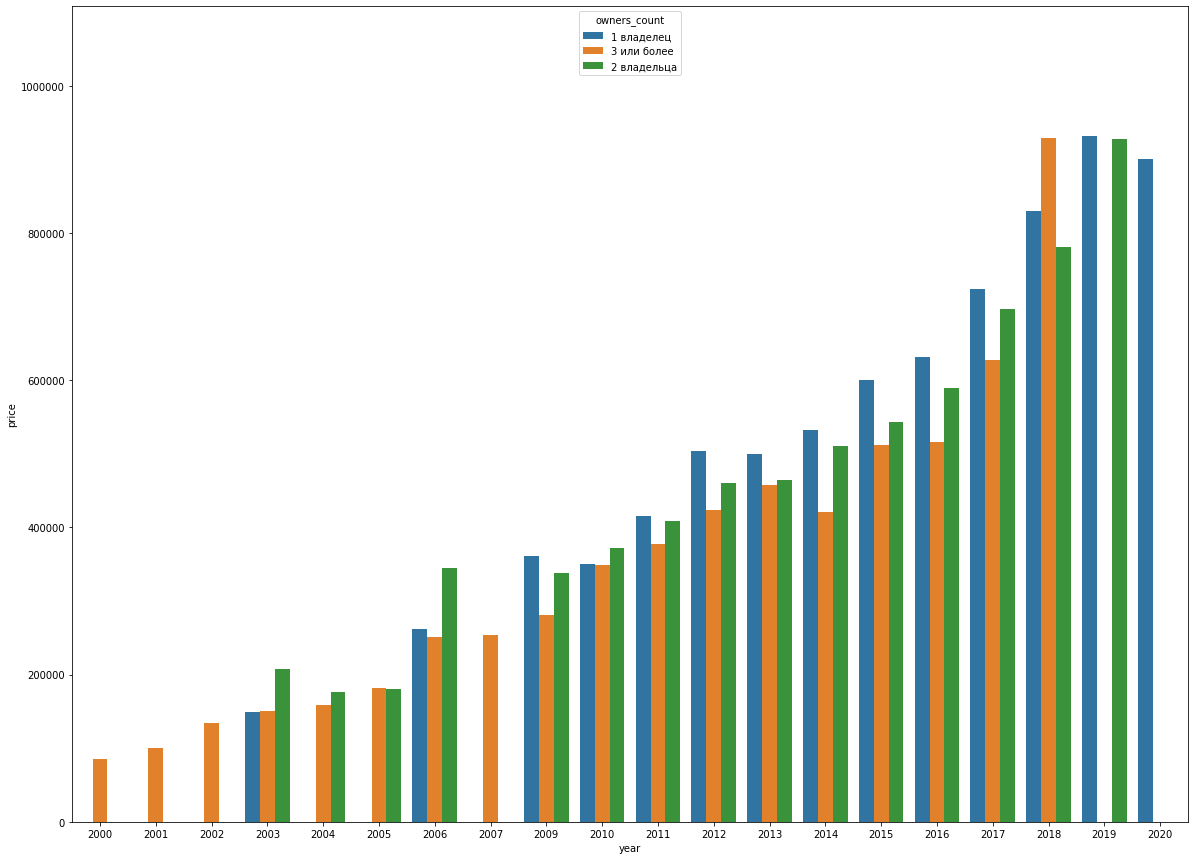

In [81]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='owners_count', errwidth=0, data=df)

In [82]:
# В большинстве годов автомобили с одним владельцем стоят дороже, дешевле с двумя и еще дешевле с 3 и более. Это не очень старые
# автомобили, на которые есть хороший спрос.

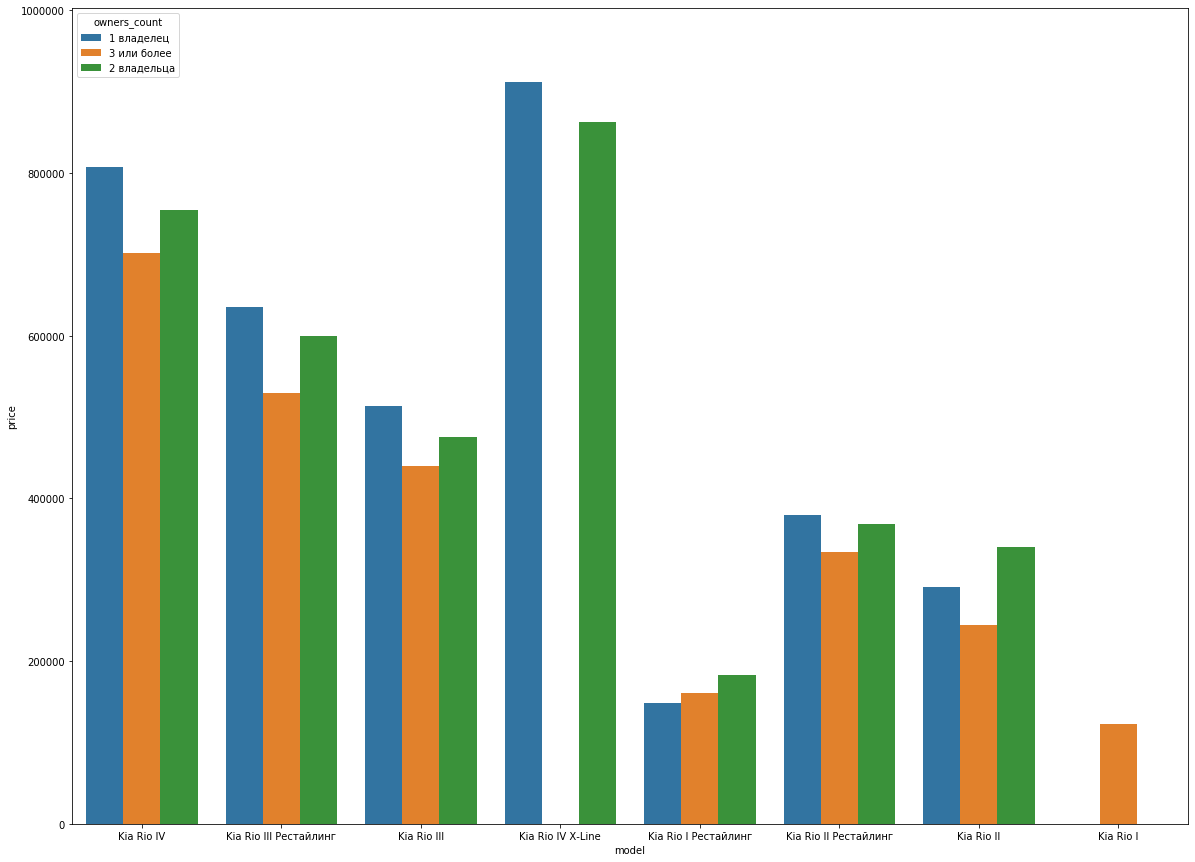

In [83]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='model', y='price', hue='owners_count', errwidth=0, data=df)

In [84]:
# Такая же картина начиная со 2 поколения с рестайлингом.

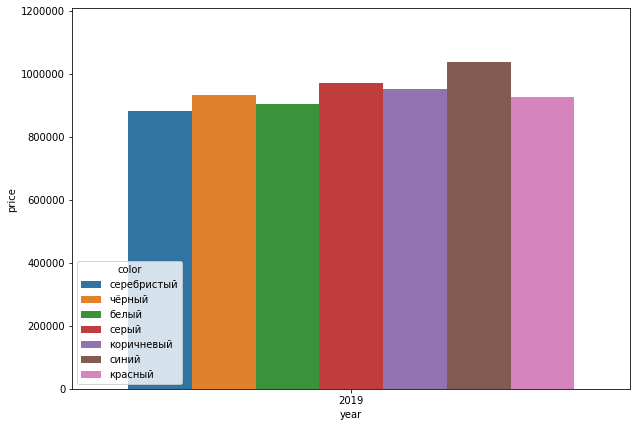

In [85]:
# Цена, в зависимости от цвета

plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

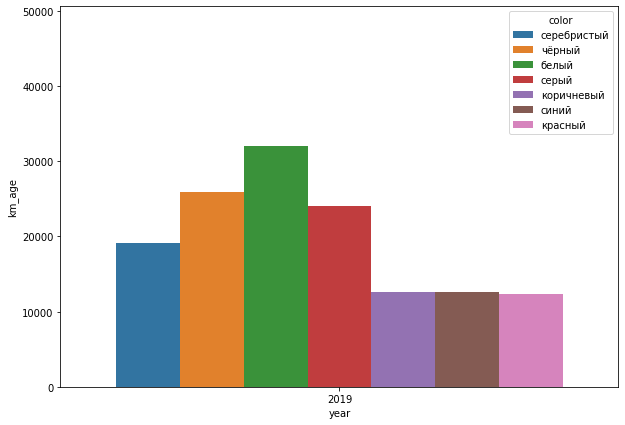

In [86]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

##### На двух последних столбчатых диаграммах мы показали автомобили 2019 года с разбивкой цены по цветам и пробега по цветам.
##### Как видно из этих диаграмм, цвет не влияет на цену (или влияет очень несущественно при прочих равных условиях),
##### например серебристые автомобили 2019 года имеют самую высокую среднюю цену, но при этом у них самый маленький средний пробег.
##### Белые автомобили (3-й столбец), напротив, имеют самую низкую цену, но самый высокий пробег, хотя белый цвет довольно популярный.

In [87]:
# проверим картину для 2018 года

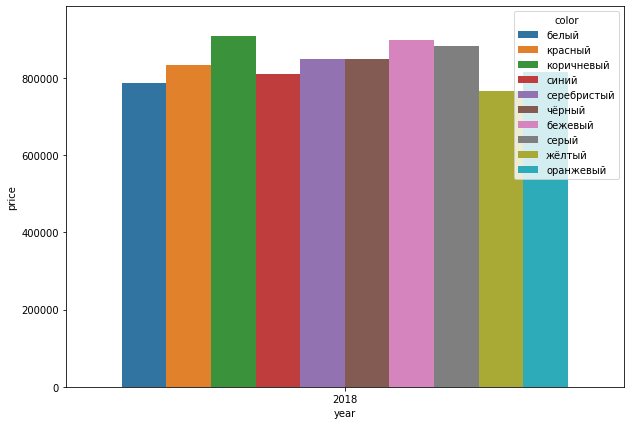

In [88]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

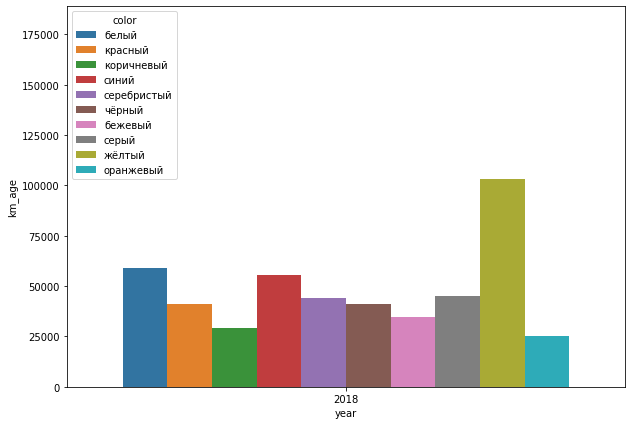

In [89]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

In [90]:
# Картина примерно такая же

In [91]:
# удалим столбец с цветом

df.drop(['color'], axis='columns', inplace=True)

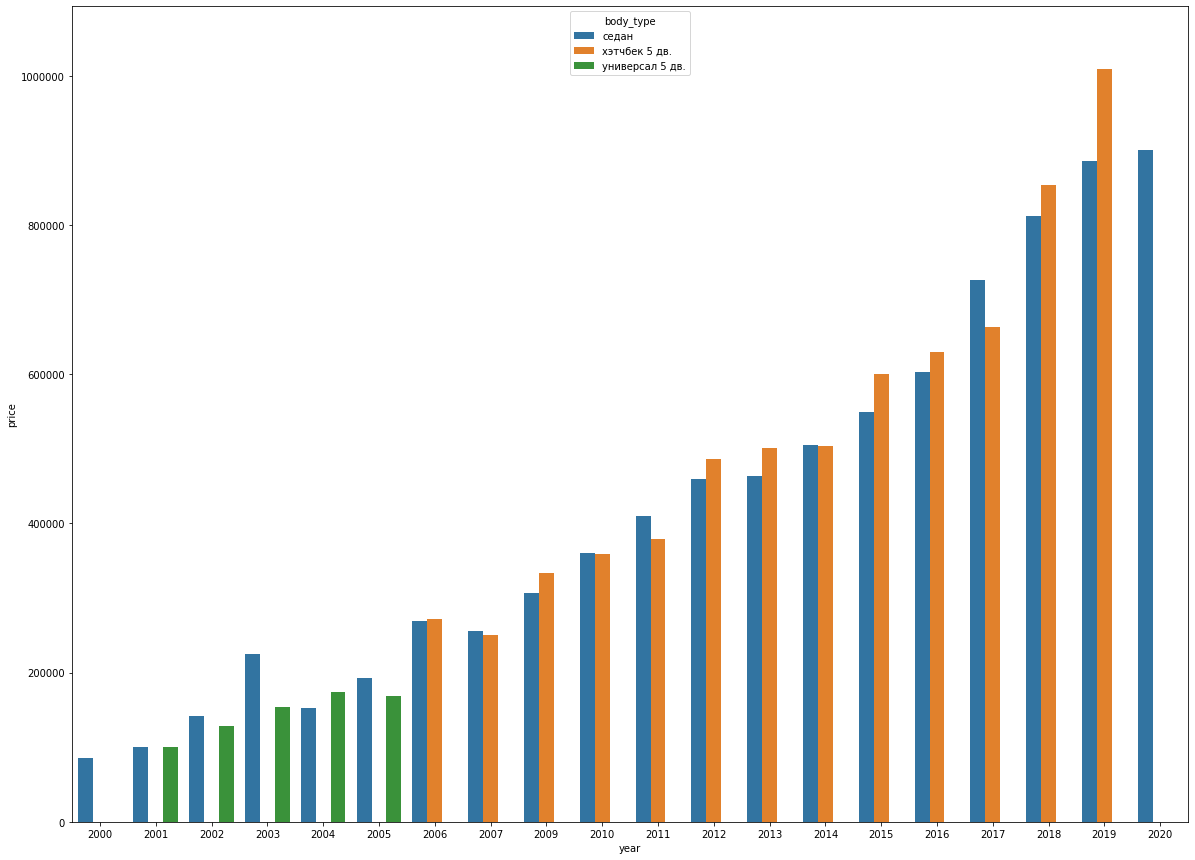

In [92]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='body_type', errwidth=0, data=df)

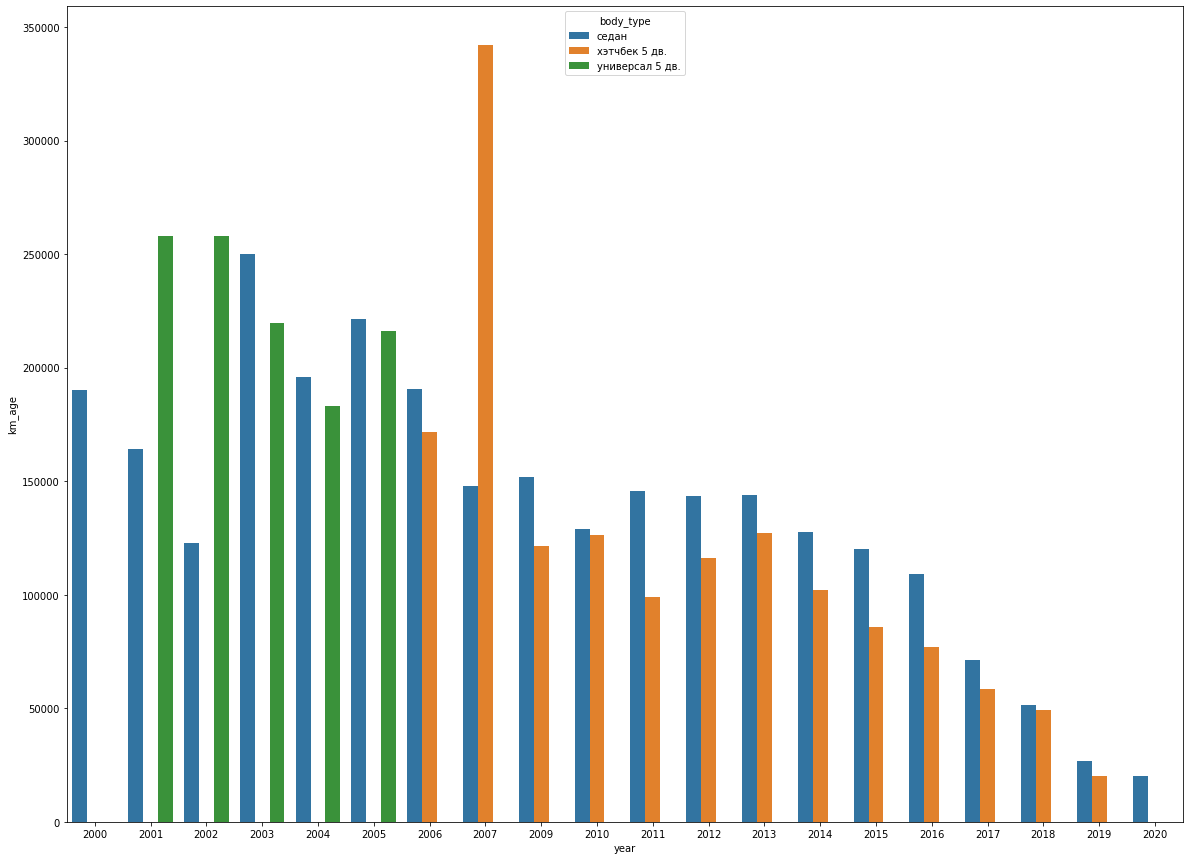

In [93]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='body_type', errwidth=0, data=df)

In [94]:
# в большинстве годов выпуска хэтчбеки стоили немного дороже седанов
# Но у хэтчбеков был ниже пробег по годам
# Новые хэтчбеки стоят немного дороже седанов, оставим этот признак

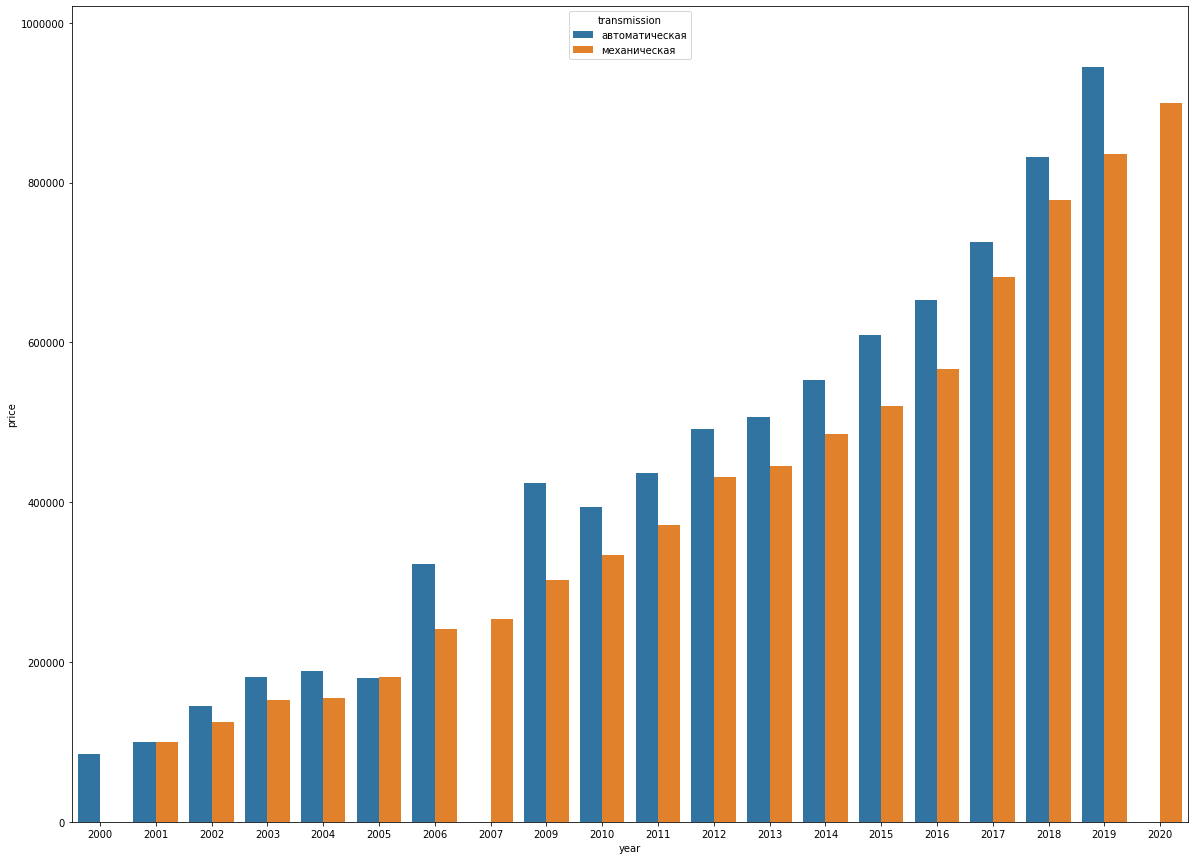

In [95]:
# Диаграмма по типу трансмиссии

plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='transmission', errwidth=0, data=df)

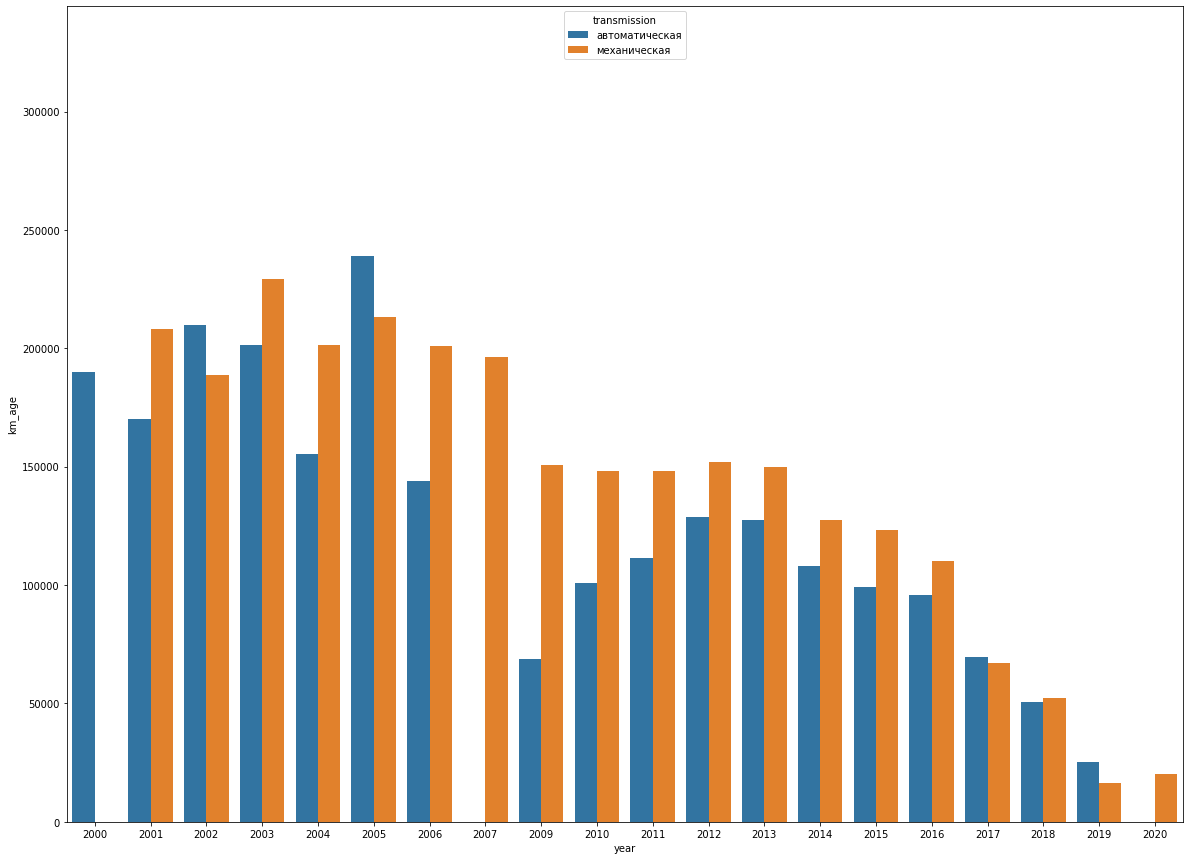

In [96]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='transmission', errwidth=0, data=df)

In [97]:
# автомобили с автоматической трансмиссией стоят дороже, но средний пробег по годам больше на "механике"
# новые автомобили на автомате стоят дороже, примем допущение, что и на подержанные распространяется такое явление

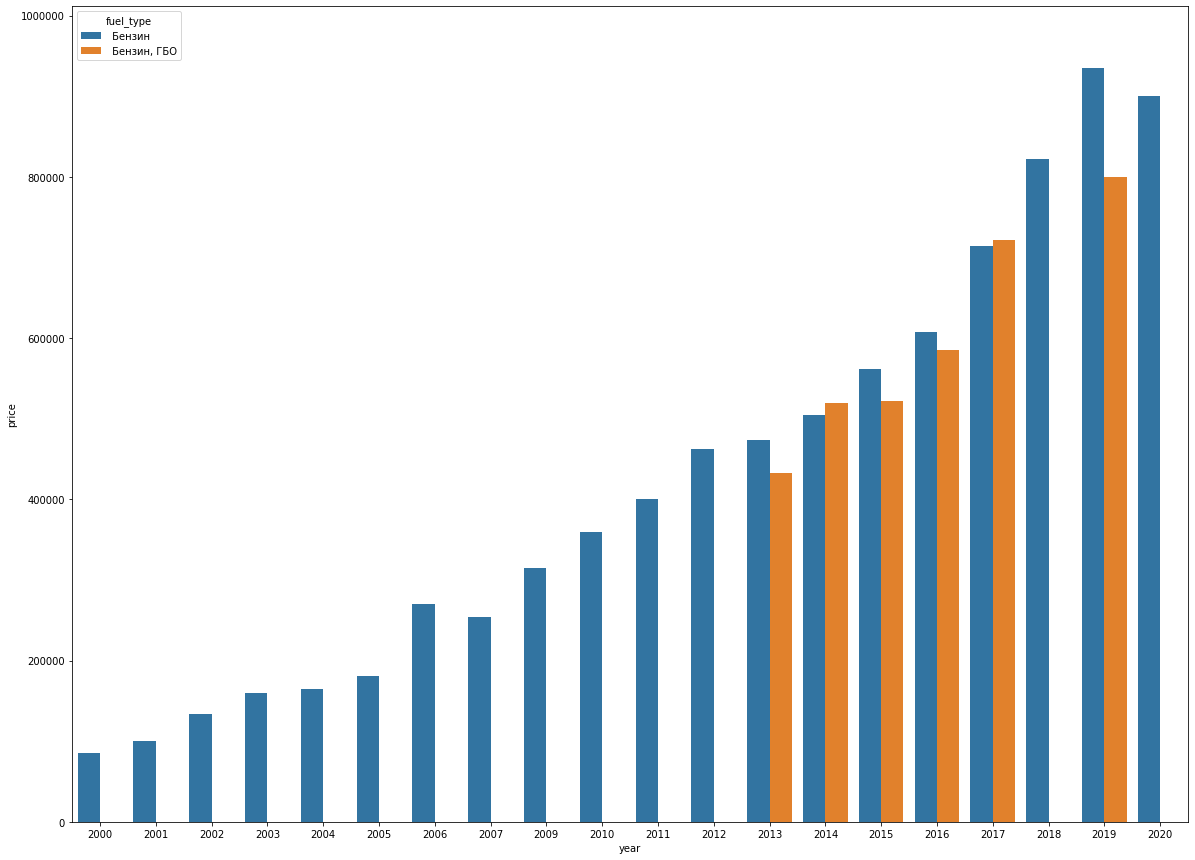

In [98]:
# Диаграммы по типу топлива

plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='fuel_type', errwidth=0, data=df)

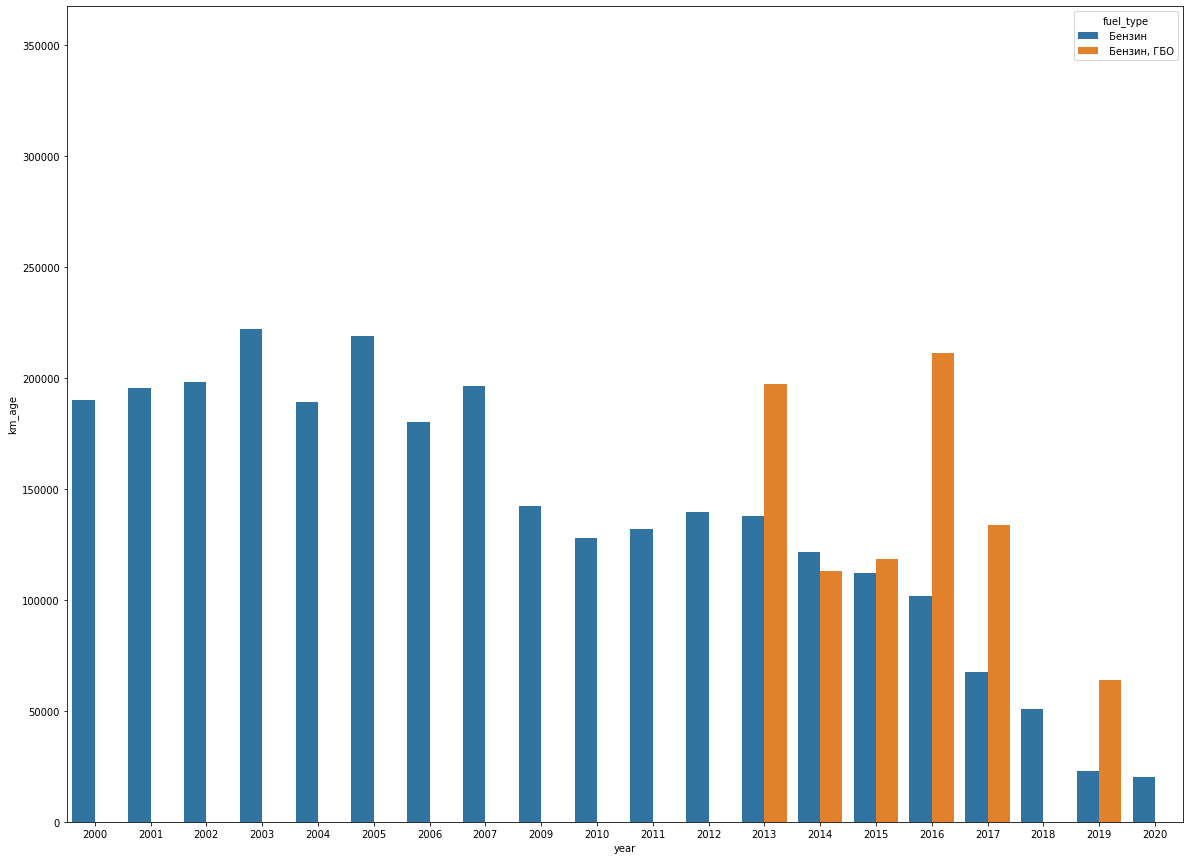

In [99]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='fuel_type', errwidth=0, data=df)

In [100]:
df.groupby('fuel_type').count()['model']

fuel_type
 Бензин         1039
 Бензин, ГБО      14
Name: model, dtype: int64

In [101]:
# автомобилей, оснащенных ГБО, всего 14 в нашей выборке, 1.3%, это несущественно, тем более из двух последних графиков
# видно, что цена автомобилей с ГБО зависит от пробега

In [102]:
# удалим этот столбец

df.drop(['fuel_type'], axis='columns', inplace=True)

In [103]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [104]:
df.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    981
Name: model, dtype: int64

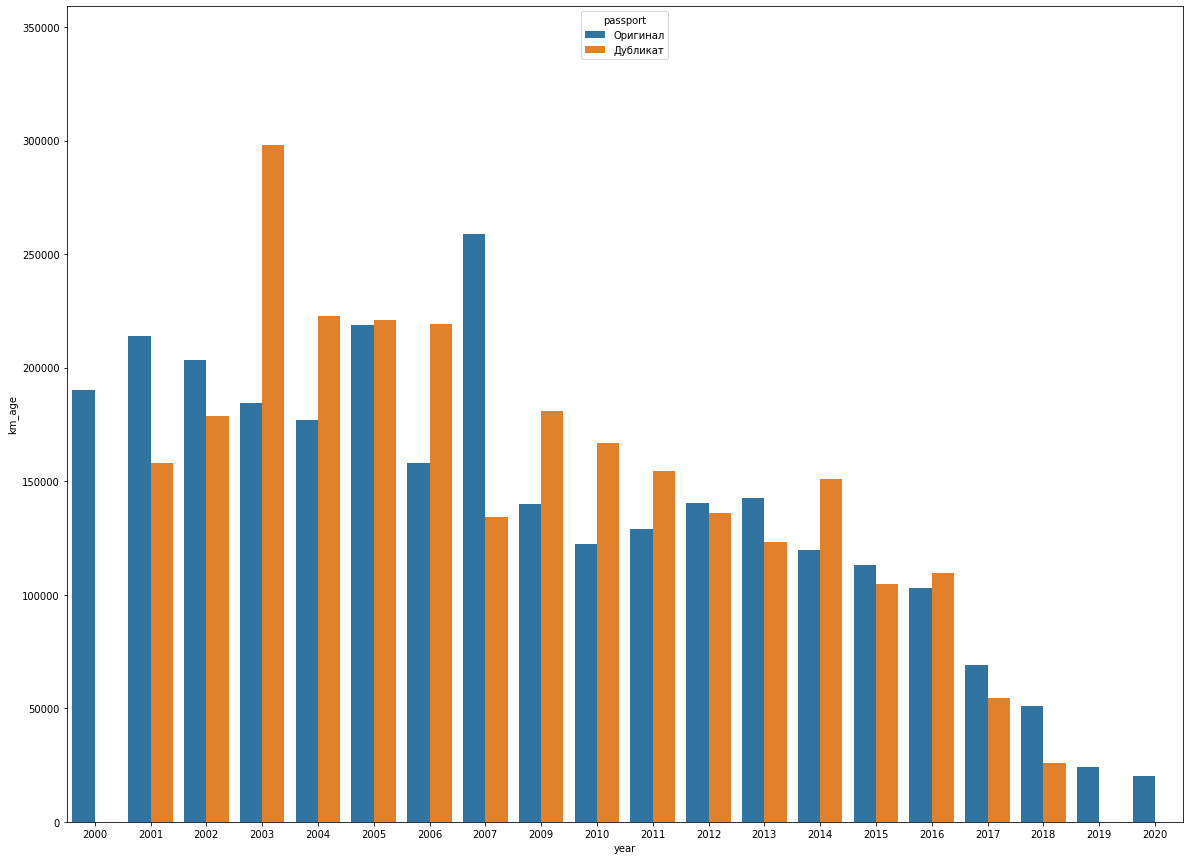

In [105]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='passport', errwidth=0, data=df)

In [106]:
# дубликат ПТС выдается, когда закончилось место в оригинале, либо при утере/порче. Место может закончиться, если много
# владельцев, причем из дубликата будет не известна информация о предыдущем ПТС - сколько там было владельцев.
# если покупатель будет делать выбор при прочих равных условиях, он выберет автомобиль с оригинальным ПТС


In [107]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [108]:
df.drop(['passport'], axis='columns', inplace=True)

## Алгоритм CatBoost

In [109]:
df.dtypes

model           object
year             int32
km_age           int32
body_type       object
engine_power     int32
transmission    object
owners_count    object
price            int32
dtype: object

### Назначаем X и y

In [110]:
X = df.drop(['price'], axis=1)
y = df['price']

In [111]:
# подберем гиперпараметры регрессора, используя кроссвалидацию
# разобъем данные на тренировочные и тестовые, test_size=0.25

In [113]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 202904.8330483	total: 49.1ms	remaining: 39.2s
1:	learn: 198822.5838106	total: 52ms	remaining: 20.8s
2:	learn: 194734.0272126	total: 54ms	remaining: 14.3s
3:	learn: 190651.8172453	total: 56.6ms	remaining: 11.3s
4:	learn: 187068.3086859	total: 59.2ms	remaining: 9.41s
5:	learn: 183267.2648967	total: 61.7ms	remaining: 8.16s
6:	learn: 179623.2991640	total: 63ms	remaining: 7.14s
7:	learn: 175998.6121255	total: 64.3ms	remaining: 6.37s
8:	learn: 172524.5877578	total: 66.1ms	remaining: 5.81s
9:	learn: 169437.0439895	total: 67.5ms	remaining: 5.33s
10:	learn: 166127.0493623	total: 68.9ms	remaining: 4.94s
11:	learn: 162917.3519487	total: 71.2ms	remaining: 4.68s
12:	learn: 159868.4925273	total: 73.2ms	remaining: 4.43s
13:	learn: 157006.2845891	total: 74.5ms	remaining: 4.18s
14:	learn: 154126.4590758	total: 75.9ms	remaining: 3.97s
15:	learn: 151348.2354156	total: 77.7ms	remaining: 3.81s
16:	learn: 148585.8016626	total: 79.2ms	remaining: 3.65s
17:	learn: 145653.6258101	total: 81.1ms	remaini

258:	learn: 54977.3998807	total: 342ms	remaining: 714ms
259:	learn: 54967.1471400	total: 342ms	remaining: 711ms
260:	learn: 54948.9003806	total: 344ms	remaining: 710ms
261:	learn: 54918.9902853	total: 345ms	remaining: 708ms
262:	learn: 54891.6739999	total: 346ms	remaining: 706ms
263:	learn: 54835.6154701	total: 346ms	remaining: 703ms
264:	learn: 54763.6924338	total: 348ms	remaining: 702ms
265:	learn: 54753.7992108	total: 348ms	remaining: 699ms
266:	learn: 54736.7740724	total: 349ms	remaining: 696ms
267:	learn: 54726.1669637	total: 350ms	remaining: 695ms
268:	learn: 54718.2961714	total: 351ms	remaining: 693ms
269:	learn: 54707.6798762	total: 352ms	remaining: 691ms
270:	learn: 54695.4573256	total: 353ms	remaining: 688ms
271:	learn: 54684.6421289	total: 354ms	remaining: 687ms
272:	learn: 54674.8621156	total: 354ms	remaining: 684ms
273:	learn: 54656.2388525	total: 355ms	remaining: 681ms
274:	learn: 54624.7434239	total: 356ms	remaining: 679ms
275:	learn: 54612.9723941	total: 356ms	remaining

421:	learn: 52771.8628063	total: 489ms	remaining: 438ms
422:	learn: 52768.7952612	total: 490ms	remaining: 436ms
423:	learn: 52760.4362457	total: 491ms	remaining: 435ms
424:	learn: 52757.9460145	total: 492ms	remaining: 434ms
425:	learn: 52748.3931221	total: 493ms	remaining: 433ms
426:	learn: 52741.6835279	total: 494ms	remaining: 432ms
427:	learn: 52730.4982418	total: 495ms	remaining: 430ms
428:	learn: 52689.4081125	total: 496ms	remaining: 429ms
429:	learn: 52673.5674997	total: 497ms	remaining: 428ms
430:	learn: 52660.8282771	total: 499ms	remaining: 427ms
431:	learn: 52651.6679859	total: 500ms	remaining: 426ms
432:	learn: 52637.9194242	total: 501ms	remaining: 425ms
433:	learn: 52629.7043346	total: 503ms	remaining: 424ms
434:	learn: 52625.3452978	total: 504ms	remaining: 423ms
435:	learn: 52620.1494965	total: 506ms	remaining: 422ms
436:	learn: 52606.3435567	total: 506ms	remaining: 420ms
437:	learn: 52599.7796284	total: 508ms	remaining: 420ms
438:	learn: 52580.9427336	total: 509ms	remaining

588:	learn: 51304.1324216	total: 639ms	remaining: 229ms
589:	learn: 51298.3369955	total: 640ms	remaining: 228ms
590:	learn: 51289.4327499	total: 642ms	remaining: 227ms
591:	learn: 51275.5834865	total: 643ms	remaining: 226ms
592:	learn: 51269.7767439	total: 645ms	remaining: 225ms
593:	learn: 51262.0944071	total: 646ms	remaining: 224ms
594:	learn: 51258.1877853	total: 647ms	remaining: 223ms
595:	learn: 51252.8946862	total: 649ms	remaining: 222ms
596:	learn: 51234.2315345	total: 651ms	remaining: 221ms
597:	learn: 51231.7439380	total: 651ms	remaining: 220ms
598:	learn: 51216.2958347	total: 653ms	remaining: 219ms
599:	learn: 51215.7477826	total: 655ms	remaining: 218ms
600:	learn: 51214.7471465	total: 656ms	remaining: 217ms
601:	learn: 51202.1253455	total: 658ms	remaining: 216ms
602:	learn: 51198.7083693	total: 658ms	remaining: 215ms
603:	learn: 51188.6911764	total: 659ms	remaining: 214ms
604:	learn: 51186.7546885	total: 660ms	remaining: 213ms
605:	learn: 51183.4780308	total: 661ms	remaining

757:	learn: 50364.0331979	total: 789ms	remaining: 43.7ms
758:	learn: 50358.2808235	total: 791ms	remaining: 42.7ms
759:	learn: 50357.5877852	total: 792ms	remaining: 41.7ms
760:	learn: 50357.1741269	total: 793ms	remaining: 40.6ms
761:	learn: 50348.4725652	total: 794ms	remaining: 39.6ms
762:	learn: 50341.2619839	total: 795ms	remaining: 38.5ms
763:	learn: 50329.0885679	total: 796ms	remaining: 37.5ms
764:	learn: 50321.7479584	total: 797ms	remaining: 36.5ms
765:	learn: 50321.2216916	total: 799ms	remaining: 35.4ms
766:	learn: 50316.1854866	total: 799ms	remaining: 34.4ms
767:	learn: 50308.3999312	total: 801ms	remaining: 33.4ms
768:	learn: 50302.9555163	total: 802ms	remaining: 32.3ms
769:	learn: 50302.4792097	total: 803ms	remaining: 31.3ms
770:	learn: 50291.5318717	total: 805ms	remaining: 30.3ms
771:	learn: 50289.4802477	total: 806ms	remaining: 29.2ms
772:	learn: 50288.7992851	total: 807ms	remaining: 28.2ms
773:	learn: 50286.6216661	total: 809ms	remaining: 27.2ms
774:	learn: 50285.2160242	total

In [114]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=3)

In [115]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 202904.8330483	total: 2.57ms	remaining: 2.05s
1:	learn: 198822.5838106	total: 4.79ms	remaining: 1.91s
2:	learn: 194734.0272126	total: 6.37ms	remaining: 1.69s
3:	learn: 190651.8172453	total: 8.4ms	remaining: 1.67s
4:	learn: 187068.3086859	total: 10.6ms	remaining: 1.68s
5:	learn: 183267.2648967	total: 13.2ms	remaining: 1.75s
6:	learn: 179623.2991640	total: 14.6ms	remaining: 1.65s
7:	learn: 175998.6121255	total: 15.8ms	remaining: 1.56s
8:	learn: 172524.5877578	total: 17.3ms	remaining: 1.52s
9:	learn: 169437.0439895	total: 18.5ms	remaining: 1.46s
10:	learn: 166127.0493623	total: 19.6ms	remaining: 1.41s
11:	learn: 162917.3519487	total: 21.6ms	remaining: 1.42s
12:	learn: 159868.4925273	total: 23.2ms	remaining: 1.41s
13:	learn: 157006.2845891	total: 24.4ms	remaining: 1.37s
14:	learn: 154126.4590758	total: 26.2ms	remaining: 1.37s
15:	learn: 151348.2354156	total: 27.8ms	remaining: 1.36s
16:	learn: 148585.8016626	total: 29ms	remaining: 1.33s
17:	learn: 145653.6258101	total: 30.5ms	rema

254:	learn: 55031.8215625	total: 297ms	remaining: 635ms
255:	learn: 55007.7400209	total: 298ms	remaining: 634ms
256:	learn: 55000.8441677	total: 300ms	remaining: 633ms
257:	learn: 54978.9391725	total: 301ms	remaining: 632ms
258:	learn: 54977.3998807	total: 301ms	remaining: 629ms
259:	learn: 54967.1471400	total: 302ms	remaining: 627ms
260:	learn: 54948.9003806	total: 303ms	remaining: 625ms
261:	learn: 54918.9902853	total: 304ms	remaining: 624ms
262:	learn: 54891.6739999	total: 305ms	remaining: 623ms
263:	learn: 54835.6154701	total: 306ms	remaining: 620ms
264:	learn: 54763.6924338	total: 307ms	remaining: 620ms
265:	learn: 54753.7992108	total: 308ms	remaining: 617ms
266:	learn: 54736.7740724	total: 308ms	remaining: 615ms
267:	learn: 54726.1669637	total: 310ms	remaining: 615ms
268:	learn: 54718.2961714	total: 311ms	remaining: 614ms
269:	learn: 54707.6798762	total: 312ms	remaining: 613ms
270:	learn: 54695.4573256	total: 313ms	remaining: 611ms
271:	learn: 54684.6421289	total: 314ms	remaining

549:	learn: 51606.7032077	total: 595ms	remaining: 270ms
550:	learn: 51591.8813124	total: 596ms	remaining: 269ms
551:	learn: 51590.0232445	total: 597ms	remaining: 268ms
552:	learn: 51580.0584605	total: 599ms	remaining: 267ms
553:	learn: 51578.4911674	total: 599ms	remaining: 266ms
554:	learn: 51577.1185062	total: 600ms	remaining: 265ms
555:	learn: 51573.4940768	total: 601ms	remaining: 264ms
556:	learn: 51561.5528207	total: 602ms	remaining: 263ms
557:	learn: 51546.2330834	total: 602ms	remaining: 261ms
558:	learn: 51530.7960983	total: 604ms	remaining: 260ms
559:	learn: 51529.4043052	total: 605ms	remaining: 259ms
560:	learn: 51525.8502287	total: 606ms	remaining: 258ms
561:	learn: 51524.3569707	total: 606ms	remaining: 257ms
562:	learn: 51523.2546094	total: 607ms	remaining: 255ms
563:	learn: 51522.1660582	total: 608ms	remaining: 254ms
564:	learn: 51511.1437446	total: 609ms	remaining: 253ms
565:	learn: 51509.2816661	total: 610ms	remaining: 252ms
566:	learn: 51502.3309773	total: 612ms	remaining

721:	learn: 50582.4551980	total: 744ms	remaining: 80.4ms
722:	learn: 50569.3431607	total: 746ms	remaining: 79.4ms
723:	learn: 50561.5540036	total: 747ms	remaining: 78.4ms
724:	learn: 50558.1764807	total: 748ms	remaining: 77.3ms
725:	learn: 50554.4622794	total: 749ms	remaining: 76.3ms
726:	learn: 50544.3625221	total: 750ms	remaining: 75.3ms
727:	learn: 50539.9996216	total: 751ms	remaining: 74.3ms
728:	learn: 50536.1454488	total: 752ms	remaining: 73.3ms
729:	learn: 50534.2768709	total: 753ms	remaining: 72.2ms
730:	learn: 50533.0521595	total: 754ms	remaining: 71.1ms
731:	learn: 50530.7523631	total: 755ms	remaining: 70.1ms
732:	learn: 50528.9674122	total: 756ms	remaining: 69.1ms
733:	learn: 50517.2515937	total: 757ms	remaining: 68ms
734:	learn: 50515.8958838	total: 758ms	remaining: 67ms
735:	learn: 50513.0670425	total: 759ms	remaining: 66ms
736:	learn: 50509.7647393	total: 760ms	remaining: 65ms
737:	learn: 50502.7186796	total: 762ms	remaining: 64ms
738:	learn: 50501.6803886	total: 762ms	re

In [117]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [118]:
# Вычисляем величину ошибки

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51335.689292


In [119]:
# Итоговые признаки для работы

df.columns

Index(['model', 'year', 'km_age', 'body_type', 'engine_power', 'transmission',
       'owners_count', 'price'],
      dtype='object')

In [120]:
# создадим фрейм под именем auto_ru_set

auto_ru_set = df

## Обработаем данные с сайта drom.ru

In [121]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

In [122]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'price', 'link']

In [123]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [124]:
auto_data.shape

(2000, 8)

In [125]:
auto_data.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,"2 поколение, рестайлинг",2011,125589,седан,95,автомат,1 запись,364000
1,3 поколение,2012,149829,хэтчбек 5 дв.,107,механика,3 записи,375000
2,3 поколение,2014,114900,седан,123,автомат,None,627000
3,"3 поколение, рестайлинг",2016,70000,хэтчбек 5 дв.,107,автомат,2 записи,597000
4,4 поколение,2020,Пробег не указан,седан,123,автомат,None,939900


In [126]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [127]:
auto_data = auto_data.loc[auto_data['km_age'] != 'Пробег не указан']

In [128]:
auto_data.shape

(1236, 8)

In [129]:
auto_data['model'].unique()

array(['2 поколение, рестайлинг', '3 поколение',
       '3 поколение, рестайлинг', '4 поколение',
       '1 поколение, рестайлинг', '2 поколение', '1 поколение'],
      dtype=object)

In [130]:
# Заменим названия модификаций, чтобы они были как в датафрейме с auto.ru

auto_data['model'] = auto_data['model'].str.replace("1 поколение",'Kia Rio I')
auto_data['model'] = auto_data['model'].str.replace("1 поколение, рестайлинг",'Kia Rio I Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("2 поколение",'Kia Rio II')
auto_data['model'] = auto_data['model'].str.replace("2 поколение, рестайлинг",'Kia Rio II Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("3 поколение",'Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace("3 поколение, рестайлинг",'Kia Rio III Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("4 поколение",'Kia Rio IV')

In [131]:
auto_data['model'].unique()

array(['Kia Rio II, рестайлинг', 'Kia Rio III', 'Kia Rio III, рестайлинг',
       'Kia Rio IV', 'Kia Rio I, рестайлинг', 'Kia Rio II', 'Kia Rio I'],
      dtype=object)

In [132]:
# появилась лишняя запятая в названиях, возможно какой-то баг, удалим ее

auto_data['model'] = auto_data['model'].str.replace(",",'')

auto_data['model'] = auto_data['model'].str.replace("рестайлинг",'Рестайлинг')

In [133]:
auto_data['model'].unique()

array(['Kia Rio II Рестайлинг', 'Kia Rio III', 'Kia Rio III Рестайлинг',
       'Kia Rio IV', 'Kia Rio I Рестайлинг', 'Kia Rio II', 'Kia Rio I'],
      dtype=object)

In [134]:
auto_data['transmission'].unique()

array(['автомат', 'механика'], dtype=object)

In [135]:
auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [136]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал'], dtype=object)

In [137]:
# Значения из первого фрейма

# array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [138]:
auto_data['body_type'] = auto_data['body_type'].str.replace('универсал','универсал 5 дв.')

In [139]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [140]:
# В дата-сете отсутствуют модели X-Line

auto_data.loc[(auto_data['model'] == 'Kia Rio IV') & (auto_data['body_type'] == 'хэтчбек 5 дв.')]

,model,year,km_age,body_type,engine_power,transmission,owners_count,price


In [141]:
# Поменяем записи по количеству владельцев

auto_data['owners_count'] = auto_data['owners_count'].str.replace('1 запись','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2 записи','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('5 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('6 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('7 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('8 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('9 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('10 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('11 записей','3 или более')

In [142]:
auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [143]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

### Распределение целевого признака (цены)


 mu = 578769.42 and sigma = 182272.49



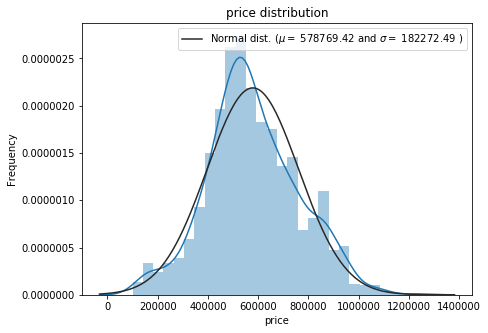

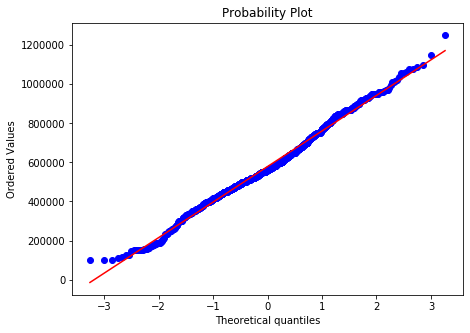

In [146]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [147]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.188846
Kurtosis: 0.094796


In [148]:
# Распределение цены близко к нормальному

In [149]:
df = auto_data

In [150]:
df.shape

(1236, 8)

In [151]:
# удалим дубликаты строк

In [152]:
df = df.drop_duplicates()

In [153]:
df.shape

(1233, 8)

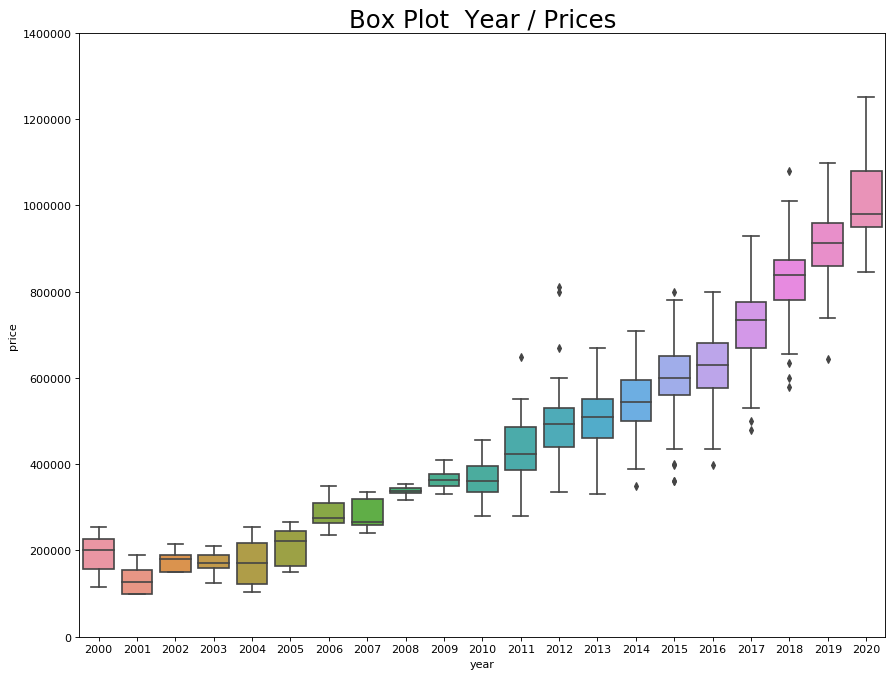

In [154]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [155]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

In [156]:
df.shape

(1215, 8)

In [157]:
# у нас удалилось 18 позиций

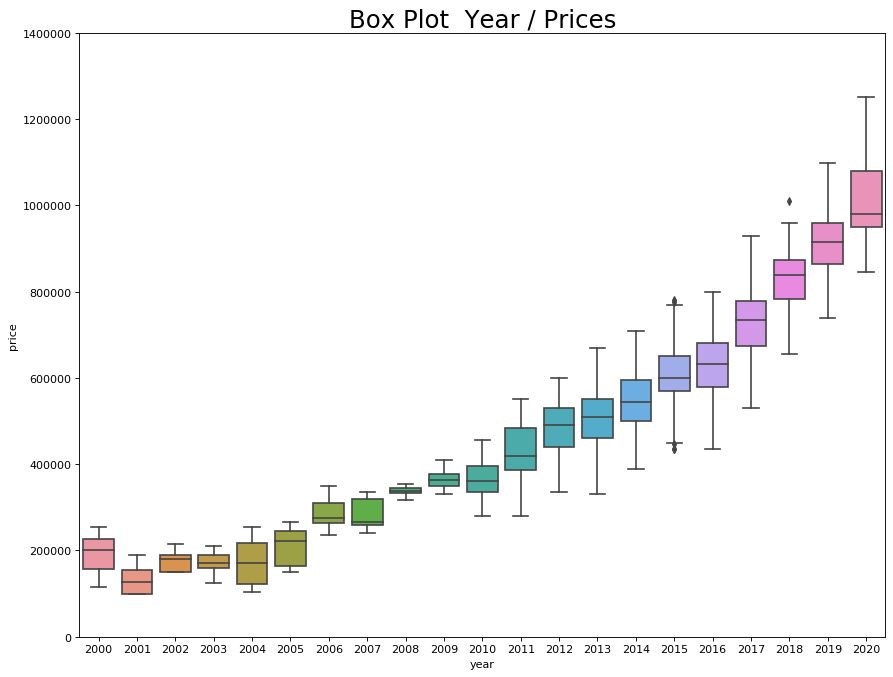

In [158]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [159]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

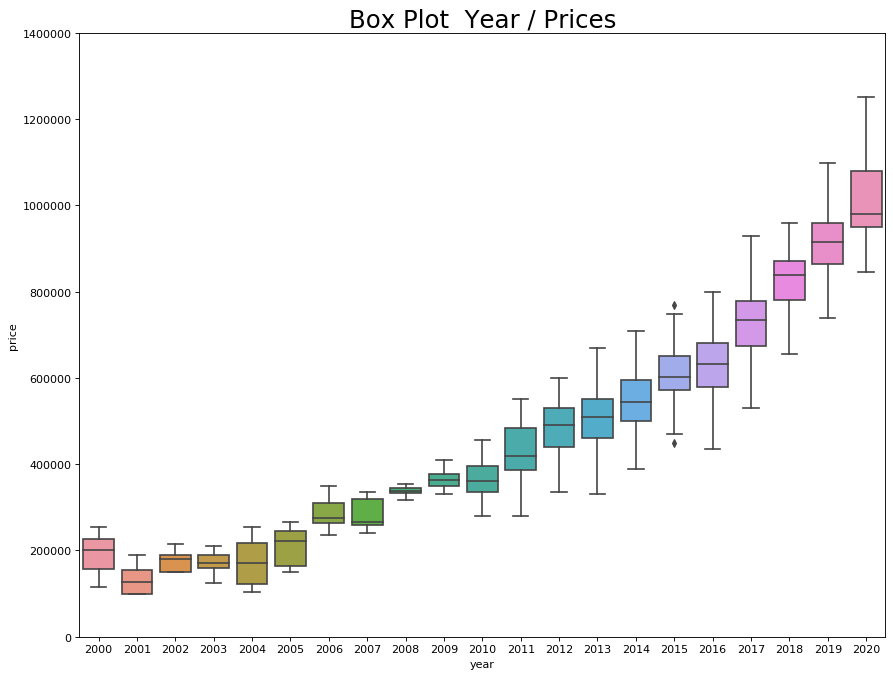

In [160]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [161]:
df.shape

(1209, 8)

In [162]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

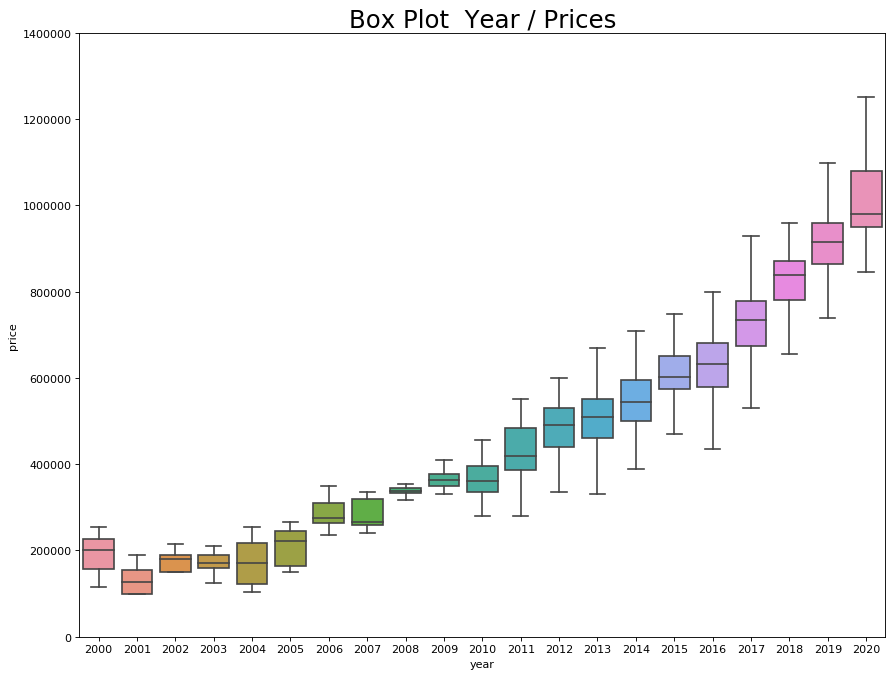

In [163]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [164]:
df.shape

(1207, 8)

## Алгоритм CatBoost

In [165]:
X = df.drop(['price'], axis=1)
y = df['price']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 180209.9329876	total: 1.94ms	remaining: 1.55s
1:	learn: 176306.0982094	total: 3.48ms	remaining: 1.39s
2:	learn: 172328.2907926	total: 5.15ms	remaining: 1.37s
3:	learn: 168951.4990494	total: 6.49ms	remaining: 1.29s
4:	learn: 165138.7008799	total: 8.29ms	remaining: 1.32s
5:	learn: 161852.1737038	total: 8.83ms	remaining: 1.17s
6:	learn: 158826.2723687	total: 10.2ms	remaining: 1.16s
7:	learn: 155526.0054249	total: 10.7ms	remaining: 1.06s
8:	learn: 152381.2609092	total: 11.7ms	remaining: 1.03s
9:	learn: 149347.4319253	total: 12.7ms	remaining: 1s
10:	learn: 146707.8043225	total: 14ms	remaining: 1s
11:	learn: 143693.7665210	total: 15.4ms	remaining: 1.01s
12:	learn: 141052.6210456	total: 15.9ms	remaining: 965ms
13:	learn: 138103.1296200	total: 16.9ms	remaining: 950ms
14:	learn: 135501.5747581	total: 17.8ms	remaining: 934ms
15:	learn: 132814.4879035	total: 19.1ms	remaining: 936ms
16:	learn: 130192.6558983	total: 20.4ms	remaining: 941ms
17:	learn: 127927.7842553	total: 21.5ms	remaining

294:	learn: 46839.0652547	total: 300ms	remaining: 514ms
295:	learn: 46835.6084071	total: 301ms	remaining: 512ms
296:	learn: 46826.8613291	total: 303ms	remaining: 513ms
297:	learn: 46813.8387859	total: 303ms	remaining: 511ms
298:	learn: 46805.4194328	total: 305ms	remaining: 510ms
299:	learn: 46800.0392260	total: 306ms	remaining: 510ms
300:	learn: 46794.5838580	total: 307ms	remaining: 509ms
301:	learn: 46787.0288966	total: 308ms	remaining: 508ms
302:	learn: 46778.3041870	total: 309ms	remaining: 506ms
303:	learn: 46765.9373791	total: 310ms	remaining: 505ms
304:	learn: 46764.1738944	total: 310ms	remaining: 504ms
305:	learn: 46762.4157934	total: 311ms	remaining: 502ms
306:	learn: 46749.8335671	total: 312ms	remaining: 502ms
307:	learn: 46746.7905174	total: 313ms	remaining: 501ms
308:	learn: 46742.1485339	total: 315ms	remaining: 500ms
309:	learn: 46723.8341012	total: 316ms	remaining: 499ms
310:	learn: 46716.9068460	total: 317ms	remaining: 498ms
311:	learn: 46715.9808505	total: 318ms	remaining

450:	learn: 45616.7951323	total: 450ms	remaining: 348ms
451:	learn: 45612.1280767	total: 450ms	remaining: 347ms
452:	learn: 45611.8552732	total: 451ms	remaining: 346ms
453:	learn: 45587.8442302	total: 452ms	remaining: 344ms
454:	learn: 45583.9169910	total: 453ms	remaining: 344ms
455:	learn: 45577.8912079	total: 454ms	remaining: 343ms
456:	learn: 45575.8256171	total: 455ms	remaining: 342ms
457:	learn: 45574.2852915	total: 457ms	remaining: 341ms
458:	learn: 45567.5631666	total: 458ms	remaining: 340ms
459:	learn: 45564.9184188	total: 459ms	remaining: 339ms
460:	learn: 45563.2124886	total: 459ms	remaining: 338ms
461:	learn: 45560.5124128	total: 460ms	remaining: 337ms
462:	learn: 45553.3749383	total: 461ms	remaining: 335ms
463:	learn: 45550.6278359	total: 461ms	remaining: 334ms
464:	learn: 45546.9993792	total: 462ms	remaining: 333ms
465:	learn: 45544.4672073	total: 463ms	remaining: 332ms
466:	learn: 45521.1387640	total: 464ms	remaining: 331ms
467:	learn: 45517.6224960	total: 465ms	remaining

605:	learn: 44854.1134983	total: 601ms	remaining: 193ms
606:	learn: 44853.1845437	total: 603ms	remaining: 192ms
607:	learn: 44852.3642071	total: 604ms	remaining: 191ms
608:	learn: 44847.8093117	total: 605ms	remaining: 190ms
609:	learn: 44839.2881216	total: 606ms	remaining: 189ms
610:	learn: 44837.8377423	total: 607ms	remaining: 188ms
611:	learn: 44833.6112389	total: 608ms	remaining: 187ms
612:	learn: 44832.7695961	total: 609ms	remaining: 186ms
613:	learn: 44830.8251034	total: 610ms	remaining: 185ms
614:	learn: 44823.1241766	total: 611ms	remaining: 184ms
615:	learn: 44822.1337673	total: 612ms	remaining: 183ms
616:	learn: 44820.3270251	total: 613ms	remaining: 182ms
617:	learn: 44817.4666466	total: 614ms	remaining: 181ms
618:	learn: 44812.8768842	total: 615ms	remaining: 180ms
619:	learn: 44806.0535357	total: 616ms	remaining: 179ms
620:	learn: 44804.9571744	total: 617ms	remaining: 178ms
621:	learn: 44801.3087704	total: 617ms	remaining: 177ms
622:	learn: 44795.6956844	total: 618ms	remaining

754:	learn: 44232.9001279	total: 752ms	remaining: 44.8ms
755:	learn: 44228.7758361	total: 754ms	remaining: 43.9ms
756:	learn: 44226.8009897	total: 755ms	remaining: 42.9ms
757:	learn: 44222.0631354	total: 755ms	remaining: 41.8ms
758:	learn: 44219.0412260	total: 756ms	remaining: 40.8ms
759:	learn: 44216.2226798	total: 757ms	remaining: 39.9ms
760:	learn: 44214.7795423	total: 758ms	remaining: 38.8ms
761:	learn: 44212.8159534	total: 758ms	remaining: 37.8ms
762:	learn: 44211.1910259	total: 759ms	remaining: 36.8ms
763:	learn: 44209.0715462	total: 761ms	remaining: 35.8ms
764:	learn: 44206.0359761	total: 762ms	remaining: 34.9ms
765:	learn: 44205.0083437	total: 763ms	remaining: 33.9ms
766:	learn: 44196.3790578	total: 764ms	remaining: 32.9ms
767:	learn: 44166.3061630	total: 765ms	remaining: 31.9ms
768:	learn: 44165.4865963	total: 766ms	remaining: 30.9ms
769:	learn: 44164.5533371	total: 767ms	remaining: 29.9ms
770:	learn: 44162.8981909	total: 767ms	remaining: 28.9ms
771:	learn: 44162.0568386	total

In [171]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.3,
                          depth=3)

In [172]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 180209.9329876	total: 2.38ms	remaining: 1.9s
1:	learn: 176306.0982094	total: 4.42ms	remaining: 1.76s
2:	learn: 172328.2907926	total: 6.67ms	remaining: 1.77s
3:	learn: 168951.4990494	total: 8.57ms	remaining: 1.71s
4:	learn: 165138.7008799	total: 11.2ms	remaining: 1.78s
5:	learn: 161852.1737038	total: 11.9ms	remaining: 1.57s
6:	learn: 158826.2723687	total: 13.7ms	remaining: 1.56s
7:	learn: 155526.0054249	total: 14.5ms	remaining: 1.43s
8:	learn: 152381.2609092	total: 15.8ms	remaining: 1.38s
9:	learn: 149347.4319253	total: 17.2ms	remaining: 1.36s
10:	learn: 146707.8043225	total: 18.7ms	remaining: 1.34s
11:	learn: 143693.7665210	total: 20.2ms	remaining: 1.32s
12:	learn: 141052.6210456	total: 20.8ms	remaining: 1.26s
13:	learn: 138103.1296200	total: 21.9ms	remaining: 1.23s
14:	learn: 135501.5747581	total: 23ms	remaining: 1.21s
15:	learn: 132814.4879035	total: 24.8ms	remaining: 1.21s
16:	learn: 130192.6558983	total: 26.5ms	remaining: 1.22s
17:	learn: 127927.7842553	total: 27.5ms	rema

223:	learn: 47632.8198506	total: 302ms	remaining: 776ms
224:	learn: 47615.1033390	total: 304ms	remaining: 776ms
225:	learn: 47592.3483950	total: 305ms	remaining: 775ms
226:	learn: 47581.9370282	total: 307ms	remaining: 776ms
227:	learn: 47554.0367549	total: 309ms	remaining: 776ms
228:	learn: 47539.4491773	total: 312ms	remaining: 778ms
229:	learn: 47525.7267005	total: 315ms	remaining: 781ms
230:	learn: 47518.0976300	total: 318ms	remaining: 784ms
231:	learn: 47504.6058854	total: 319ms	remaining: 781ms
232:	learn: 47480.1216747	total: 321ms	remaining: 781ms
233:	learn: 47471.3341000	total: 323ms	remaining: 780ms
234:	learn: 47455.6332906	total: 324ms	remaining: 779ms
235:	learn: 47445.8747126	total: 325ms	remaining: 776ms
236:	learn: 47431.7349721	total: 326ms	remaining: 775ms
237:	learn: 47421.8676648	total: 327ms	remaining: 773ms
238:	learn: 47411.6480076	total: 328ms	remaining: 770ms
239:	learn: 47401.3993940	total: 329ms	remaining: 768ms
240:	learn: 47389.1538153	total: 331ms	remaining

505:	learn: 45315.2716240	total: 597ms	remaining: 347ms
506:	learn: 45311.3783156	total: 598ms	remaining: 346ms
507:	learn: 45309.6037975	total: 600ms	remaining: 345ms
508:	learn: 45307.3583643	total: 602ms	remaining: 344ms
509:	learn: 45299.9883753	total: 602ms	remaining: 342ms
510:	learn: 45291.0399495	total: 604ms	remaining: 342ms
511:	learn: 45286.0182233	total: 604ms	remaining: 340ms
512:	learn: 45280.6377449	total: 605ms	remaining: 339ms
513:	learn: 45279.1960332	total: 607ms	remaining: 338ms
514:	learn: 45276.9156654	total: 608ms	remaining: 336ms
515:	learn: 45273.8776310	total: 609ms	remaining: 335ms
516:	learn: 45266.3278809	total: 610ms	remaining: 334ms
517:	learn: 45263.5631138	total: 611ms	remaining: 333ms
518:	learn: 45261.5997701	total: 613ms	remaining: 332ms
519:	learn: 45257.0192928	total: 614ms	remaining: 331ms
520:	learn: 45253.1215240	total: 615ms	remaining: 329ms
521:	learn: 45247.1275826	total: 617ms	remaining: 328ms
522:	learn: 45246.8927503	total: 618ms	remaining

766:	learn: 44196.3790578	total: 894ms	remaining: 38.4ms
767:	learn: 44166.3061630	total: 895ms	remaining: 37.3ms
768:	learn: 44165.4865963	total: 897ms	remaining: 36.1ms
769:	learn: 44164.5533371	total: 897ms	remaining: 35ms
770:	learn: 44162.8981909	total: 898ms	remaining: 33.8ms
771:	learn: 44162.0568386	total: 899ms	remaining: 32.6ms
772:	learn: 44161.0052338	total: 900ms	remaining: 31.4ms
773:	learn: 44155.7573550	total: 900ms	remaining: 30.2ms
774:	learn: 44149.4220554	total: 901ms	remaining: 29.1ms
775:	learn: 44148.4192971	total: 902ms	remaining: 27.9ms
776:	learn: 44145.1108673	total: 904ms	remaining: 26.7ms
777:	learn: 44142.4842903	total: 905ms	remaining: 25.6ms
778:	learn: 44119.3747373	total: 906ms	remaining: 24.4ms
779:	learn: 44111.0294036	total: 906ms	remaining: 23.2ms
780:	learn: 44107.9455790	total: 907ms	remaining: 22.1ms
781:	learn: 44104.1532618	total: 909ms	remaining: 20.9ms
782:	learn: 44103.2563604	total: 909ms	remaining: 19.7ms
783:	learn: 44098.6257743	total: 

In [173]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [174]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 48058.520209


In [175]:
# создадим фрейм под именем drom_ru_set

drom_ru_set = df

## Обработаем данные с сайта с avito.ru

In [176]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

In [177]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'condition', 'price', 'link' ]

In [178]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [179]:
auto_data.shape

(4707, 9)

In [180]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [181]:
auto_data.shape

(4328, 9)

In [182]:
auto_data['transmission'].unique()

array(['автомат', 'механика'], dtype=object)

In [183]:
auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [184]:
auto_data['condition'].unique()

array(['не битый', 'битый'], dtype=object)

In [185]:
auto_data.groupby('condition').count()['model']

condition
битый        108
не битый    4220
Name: model, dtype: int64

In [186]:
# итого 108 битых автомобилей. Удалим их

auto_data = auto_data.loc[auto_data['condition'] != 'битый']

In [187]:
# Теперь можно удалить столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [188]:
auto_data['model'].unique()

array(['II рестайлинг', 'II', 'III', 'IV', 'III рестайлинг',
       'I рестайлинг', 'I', 'IV рестайлинг'], dtype=object)

In [189]:
auto_data['model'] = 'Kia Rio ' + auto_data['model']

In [190]:
auto_data['model'] = auto_data['model'].str.replace('рестайлинг','Рестайлинг')

In [191]:
auto_data['model'].unique()

array(['Kia Rio II Рестайлинг', 'Kia Rio II', 'Kia Rio III', 'Kia Rio IV',
       'Kia Rio III Рестайлинг', 'Kia Rio I Рестайлинг', 'Kia Rio I',
       'Kia Rio IV Рестайлинг'], dtype=object)

In [192]:
auto_data['owners_count'].unique()

array(['3', '2', '4+', '1'], dtype=object)

In [193]:
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('1','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4+','3 или более')

In [194]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '3 или более+', '1 владелец'],
      dtype=object)

In [195]:
auto_data['owners_count'] = auto_data['owners_count'].str.replace('+','')

In [196]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '1 владелец'], dtype=object)

In [197]:
auto_data['body_type'].unique()

array(['седан', 'хетчбэк'], dtype=object)

In [198]:
# Значения из первого фрейма

# array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [199]:
auto_data['body_type'] = auto_data['body_type'].str.replace('хетчбэк','хэтчбек 5 дв.')

In [200]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.'], dtype=object)

In [201]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [202]:
auto_data.shape

(4220, 8)

In [203]:
# удалим дубликаты

auto_data = auto_data.drop_duplicates()

In [213]:
# удалим новые автомобили (с очень маленьким пробегом)

auto_data = auto_data.loc[auto_data['km_age'] > 150]

In [214]:
auto_data.shape

(4024, 8)

### Распределение целевого признака (цены)


 mu = 568955.81 and sigma = 196367.20



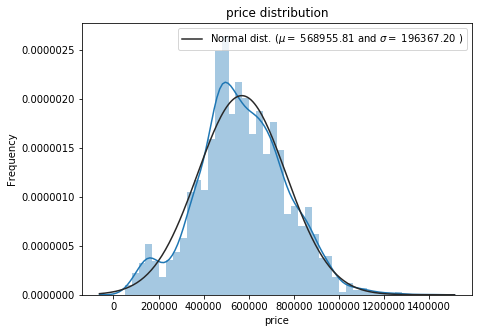

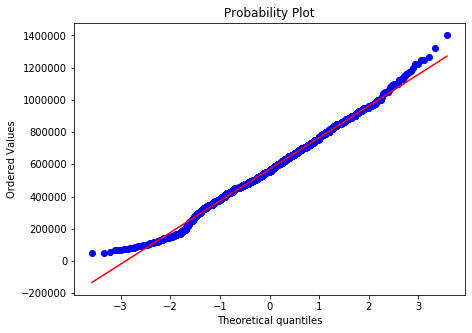

In [215]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [216]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.073959
Kurtosis: 0.162472


In [217]:
# Распределение цены близко к нормальному

## Графики

In [218]:
df = auto_data

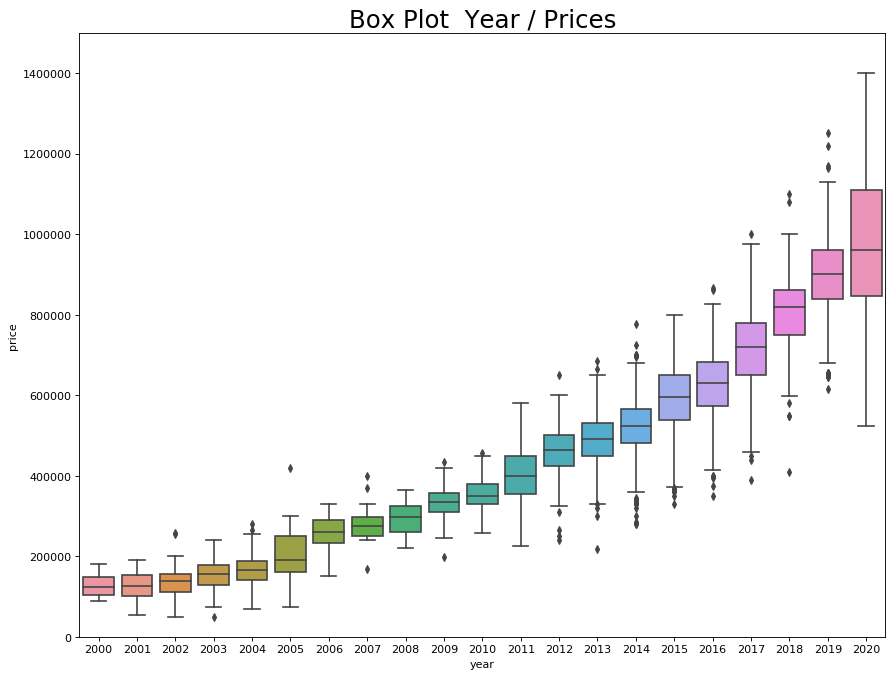

In [219]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [220]:
df.shape

(4024, 8)

In [221]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

In [222]:
df.shape

(3950, 8)

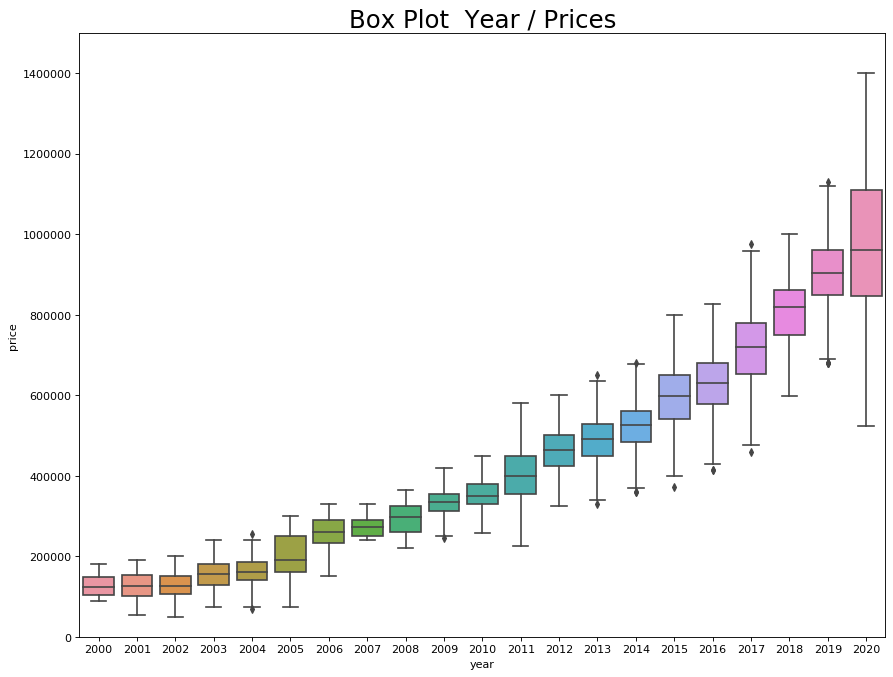

In [223]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [224]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

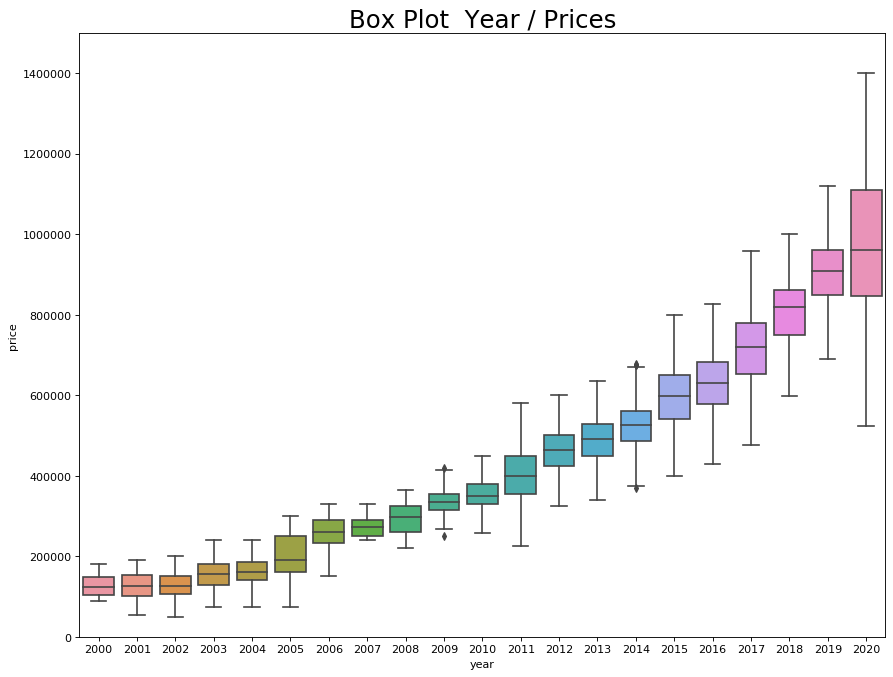

In [225]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [226]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

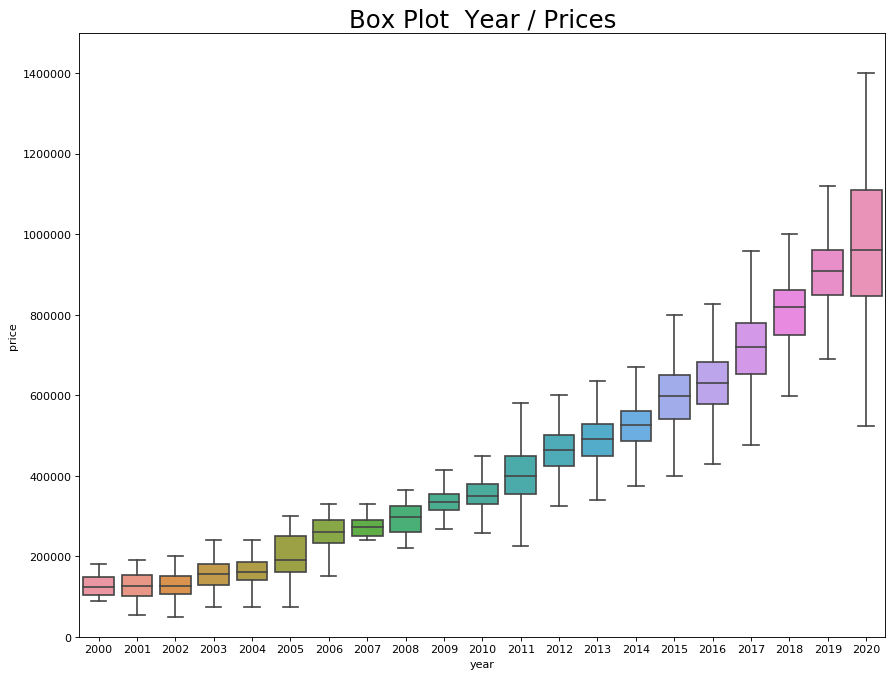

In [227]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

## Алгоритм CatBoost

In [228]:
X = df.drop(['price'], axis=1)
y = df['price']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 189862.1251020	total: 2.37ms	remaining: 1.9s
1:	learn: 185582.4562939	total: 5.16ms	remaining: 2.06s
2:	learn: 181671.8657048	total: 7.31ms	remaining: 1.94s
3:	learn: 177850.4477405	total: 8.78ms	remaining: 1.75s
4:	learn: 174161.4797942	total: 11ms	remaining: 1.75s
5:	learn: 170841.8155078	total: 12.4ms	remaining: 1.65s
6:	learn: 167263.2778545	total: 13.8ms	remaining: 1.56s
7:	learn: 163810.9494978	total: 15ms	remaining: 1.49s
8:	learn: 160575.8836873	total: 16.3ms	remaining: 1.44s
9:	learn: 157332.2717590	total: 18ms	remaining: 1.42s
10:	learn: 154228.2227335	total: 19.6ms	remaining: 1.4s
11:	learn: 151331.8679740	total: 20.8ms	remaining: 1.36s
12:	learn: 148297.1864869	total: 22ms	remaining: 1.33s
13:	learn: 145331.5703271	total: 23.1ms	remaining: 1.3s
14:	learn: 142696.8874514	total: 24.8ms	remaining: 1.3s
15:	learn: 139950.3773648	total: 26ms	remaining: 1.27s
16:	learn: 137335.5207155	total: 27.2ms	remaining: 1.25s
17:	learn: 134798.5761222	total: 28.8ms	remaining: 1.25

253:	learn: 51939.8865676	total: 320ms	remaining: 687ms
254:	learn: 51936.5741673	total: 320ms	remaining: 685ms
255:	learn: 51919.7534104	total: 321ms	remaining: 682ms
256:	learn: 51903.8327964	total: 323ms	remaining: 682ms
257:	learn: 51888.9033005	total: 324ms	remaining: 680ms
258:	learn: 51872.9486051	total: 325ms	remaining: 680ms
259:	learn: 51858.2394121	total: 327ms	remaining: 680ms
260:	learn: 51851.2831205	total: 329ms	remaining: 680ms
261:	learn: 51841.1660422	total: 331ms	remaining: 679ms
262:	learn: 51824.3585966	total: 332ms	remaining: 678ms
263:	learn: 51812.7052808	total: 333ms	remaining: 676ms
264:	learn: 51804.8490064	total: 334ms	remaining: 674ms
265:	learn: 51789.4282620	total: 335ms	remaining: 673ms
266:	learn: 51780.1113675	total: 336ms	remaining: 672ms
267:	learn: 51763.9011931	total: 338ms	remaining: 670ms
268:	learn: 51750.8305748	total: 339ms	remaining: 669ms
269:	learn: 51732.2799659	total: 340ms	remaining: 667ms
270:	learn: 51713.1088656	total: 341ms	remaining

405:	learn: 50764.5105978	total: 472ms	remaining: 458ms
406:	learn: 50762.0437877	total: 473ms	remaining: 457ms
407:	learn: 50758.1688902	total: 474ms	remaining: 455ms
408:	learn: 50752.8606751	total: 474ms	remaining: 453ms
409:	learn: 50751.3431092	total: 476ms	remaining: 452ms
410:	learn: 50749.9107756	total: 476ms	remaining: 451ms
411:	learn: 50749.6735464	total: 477ms	remaining: 449ms
412:	learn: 50741.3178053	total: 479ms	remaining: 449ms
413:	learn: 50737.0180621	total: 479ms	remaining: 447ms
414:	learn: 50731.2001996	total: 481ms	remaining: 446ms
415:	learn: 50729.4776905	total: 482ms	remaining: 445ms
416:	learn: 50713.9972031	total: 483ms	remaining: 444ms
417:	learn: 50710.1543041	total: 484ms	remaining: 442ms
418:	learn: 50705.1262729	total: 485ms	remaining: 441ms
419:	learn: 50703.7936665	total: 486ms	remaining: 440ms
420:	learn: 50701.8707982	total: 487ms	remaining: 438ms
421:	learn: 50701.2714959	total: 487ms	remaining: 436ms
422:	learn: 50696.2362566	total: 488ms	remaining

599:	learn: 49988.5889466	total: 621ms	remaining: 207ms
600:	learn: 49987.1970185	total: 622ms	remaining: 206ms
601:	learn: 49986.9598877	total: 623ms	remaining: 205ms
602:	learn: 49986.7287881	total: 624ms	remaining: 204ms
603:	learn: 49984.6975247	total: 625ms	remaining: 203ms
604:	learn: 49984.4729298	total: 625ms	remaining: 202ms
605:	learn: 49979.5121436	total: 626ms	remaining: 200ms
606:	learn: 49975.8965844	total: 627ms	remaining: 199ms
607:	learn: 49975.6779869	total: 627ms	remaining: 198ms
608:	learn: 49973.6198491	total: 628ms	remaining: 197ms
609:	learn: 49968.3210344	total: 629ms	remaining: 196ms
610:	learn: 49964.3763009	total: 629ms	remaining: 195ms
611:	learn: 49954.4092610	total: 630ms	remaining: 194ms
612:	learn: 49952.4591881	total: 631ms	remaining: 192ms
613:	learn: 49949.9476677	total: 631ms	remaining: 191ms
614:	learn: 49943.8553750	total: 632ms	remaining: 190ms
615:	learn: 49943.6422795	total: 633ms	remaining: 189ms
616:	learn: 49942.9351309	total: 633ms	remaining

792:	learn: 49415.2928355	total: 770ms	remaining: 6.8ms
793:	learn: 49411.8261155	total: 771ms	remaining: 5.83ms
794:	learn: 49409.3349088	total: 772ms	remaining: 4.85ms
795:	learn: 49407.6080509	total: 773ms	remaining: 3.88ms
796:	learn: 49407.1229996	total: 773ms	remaining: 2.91ms
797:	learn: 49403.6052858	total: 775ms	remaining: 1.94ms
798:	learn: 49400.2448161	total: 776ms	remaining: 971us
799:	learn: 49399.7796501	total: 777ms	remaining: 0us

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9276985951555984

 The best parameters across ALL searched params:
 {'depth': 3, 'iterations': 800, 'learning_rate': 0.03, 'subsample': 1}



In [230]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=1,
                          depth=3)

In [231]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 189862.1251020	total: 3.03ms	remaining: 2.42s
1:	learn: 185582.4562939	total: 6.22ms	remaining: 2.48s
2:	learn: 181671.8657048	total: 8.85ms	remaining: 2.35s
3:	learn: 177850.4477405	total: 10.5ms	remaining: 2.09s
4:	learn: 174161.4797942	total: 13ms	remaining: 2.06s
5:	learn: 170841.8155078	total: 14.5ms	remaining: 1.91s
6:	learn: 167263.2778545	total: 15.9ms	remaining: 1.8s
7:	learn: 163810.9494978	total: 17.4ms	remaining: 1.72s
8:	learn: 160575.8836873	total: 18.9ms	remaining: 1.66s
9:	learn: 157332.2717590	total: 21.1ms	remaining: 1.67s
10:	learn: 154228.2227335	total: 23.6ms	remaining: 1.7s
11:	learn: 151331.8679740	total: 25.4ms	remaining: 1.67s
12:	learn: 148297.1864869	total: 27ms	remaining: 1.63s
13:	learn: 145331.5703271	total: 28.5ms	remaining: 1.6s
14:	learn: 142696.8874514	total: 30.5ms	remaining: 1.59s
15:	learn: 139950.3773648	total: 32.1ms	remaining: 1.57s
16:	learn: 137335.5207155	total: 33.9ms	remaining: 1.56s
17:	learn: 134798.5761222	total: 35.9ms	remainin

195:	learn: 53009.0304006	total: 314ms	remaining: 968ms
196:	learn: 52994.2497356	total: 315ms	remaining: 964ms
197:	learn: 52977.8758996	total: 317ms	remaining: 963ms
198:	learn: 52954.9541229	total: 318ms	remaining: 961ms
199:	learn: 52940.1601095	total: 320ms	remaining: 960ms
200:	learn: 52922.6647622	total: 322ms	remaining: 959ms
201:	learn: 52906.0400687	total: 324ms	remaining: 959ms
202:	learn: 52867.6009953	total: 326ms	remaining: 959ms
203:	learn: 52830.3642274	total: 328ms	remaining: 958ms
204:	learn: 52803.9720378	total: 330ms	remaining: 957ms
205:	learn: 52779.3960934	total: 331ms	remaining: 955ms
206:	learn: 52757.1065947	total: 333ms	remaining: 954ms
207:	learn: 52721.8481576	total: 335ms	remaining: 953ms
208:	learn: 52703.9289785	total: 336ms	remaining: 951ms
209:	learn: 52677.0194241	total: 338ms	remaining: 950ms
210:	learn: 52658.8926371	total: 340ms	remaining: 950ms
211:	learn: 52635.8459186	total: 342ms	remaining: 948ms
212:	learn: 52609.1766476	total: 342ms	remaining

439:	learn: 50618.5081686	total: 618ms	remaining: 506ms
440:	learn: 50616.4597528	total: 619ms	remaining: 504ms
441:	learn: 50615.1665986	total: 620ms	remaining: 502ms
442:	learn: 50613.9459672	total: 621ms	remaining: 500ms
443:	learn: 50609.7955477	total: 621ms	remaining: 498ms
444:	learn: 50609.5580208	total: 622ms	remaining: 496ms
445:	learn: 50605.5860501	total: 623ms	remaining: 494ms
446:	learn: 50603.6182723	total: 624ms	remaining: 492ms
447:	learn: 50602.3915109	total: 624ms	remaining: 491ms
448:	learn: 50600.6332591	total: 625ms	remaining: 489ms
449:	learn: 50596.8046356	total: 626ms	remaining: 487ms
450:	learn: 50595.7407443	total: 626ms	remaining: 485ms
451:	learn: 50592.0577641	total: 627ms	remaining: 483ms
452:	learn: 50590.1077340	total: 629ms	remaining: 481ms
453:	learn: 50583.5868557	total: 630ms	remaining: 480ms
454:	learn: 50575.8482488	total: 631ms	remaining: 479ms
455:	learn: 50575.3526770	total: 632ms	remaining: 477ms
456:	learn: 50561.4516485	total: 633ms	remaining

626:	learn: 49889.7399181	total: 767ms	remaining: 212ms
627:	learn: 49887.9134334	total: 768ms	remaining: 210ms
628:	learn: 49881.6359417	total: 770ms	remaining: 209ms
629:	learn: 49881.4379186	total: 770ms	remaining: 208ms
630:	learn: 49872.4784570	total: 771ms	remaining: 206ms
631:	learn: 49871.2925262	total: 773ms	remaining: 205ms
632:	learn: 49865.4848679	total: 775ms	remaining: 204ms
633:	learn: 49865.2904178	total: 776ms	remaining: 203ms
634:	learn: 49860.6074351	total: 777ms	remaining: 202ms
635:	learn: 49856.4313986	total: 777ms	remaining: 200ms
636:	learn: 49855.5820897	total: 778ms	remaining: 199ms
637:	learn: 49850.0946433	total: 779ms	remaining: 198ms
638:	learn: 49842.6903069	total: 779ms	remaining: 196ms
639:	learn: 49841.5325034	total: 780ms	remaining: 195ms
640:	learn: 49837.0245196	total: 782ms	remaining: 194ms
641:	learn: 49835.3174703	total: 783ms	remaining: 193ms
642:	learn: 49829.5356579	total: 784ms	remaining: 191ms
643:	learn: 49826.7710761	total: 786ms	remaining

In [232]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [233]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 52587.921284


In [234]:
# создадим фрейм под именем avito_ru_set

avito_ru_set = df

In [235]:
auto_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000


In [236]:
drom_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2011,125589,седан,95,автоматическая,1 владелец,364000
1,Kia Rio III,2012,149829,хэтчбек 5 дв.,107,механическая,3 или более,375000
3,Kia Rio III Рестайлинг,2016,70000,хэтчбек 5 дв.,107,автоматическая,2 владельца,597000
8,Kia Rio III Рестайлинг,2016,101000,седан,107,автоматическая,1 владелец,640000
10,Kia Rio IV,2017,63000,седан,123,механическая,1 владелец,759000


In [237]:
avito_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2009,169700,седан,97,автоматическая,3 или более,340000
1,Kia Rio II,2007,290000,седан,97,автоматическая,2 владельца,290000
2,Kia Rio III,2011,132000,седан,123,автоматическая,3 или более,485000
3,Kia Rio III,2012,93000,хэтчбек 5 дв.,123,механическая,1 владелец,450000
4,Kia Rio III,2012,150000,седан,107,механическая,3 или более,429000


#### объединим все три фрейма в один

In [238]:
new_df = pd.concat([auto_ru_set, drom_ru_set, avito_ru_set], ignore_index=True)

In [239]:
new_df.shape

(6186, 8)

In [240]:
# удалим дубликаты, на разных сайтах объявления могут совпадать

new_df = new_df.drop_duplicates()

In [241]:
new_df.shape

(5884, 8)

#### Итак, мы получили один итоговый датафрейм, соединив три фрейма с разных площадок

In [242]:
df = new_df


 mu = 568955.81 and sigma = 196367.20



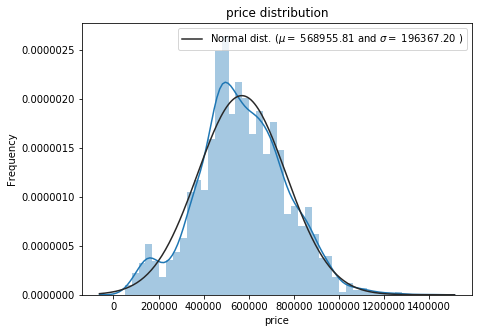

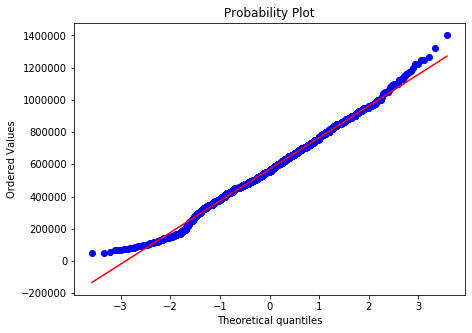

In [243]:
# Посмотрим, как распределена цена

plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [244]:
# Теперь посмотрим на выбросы

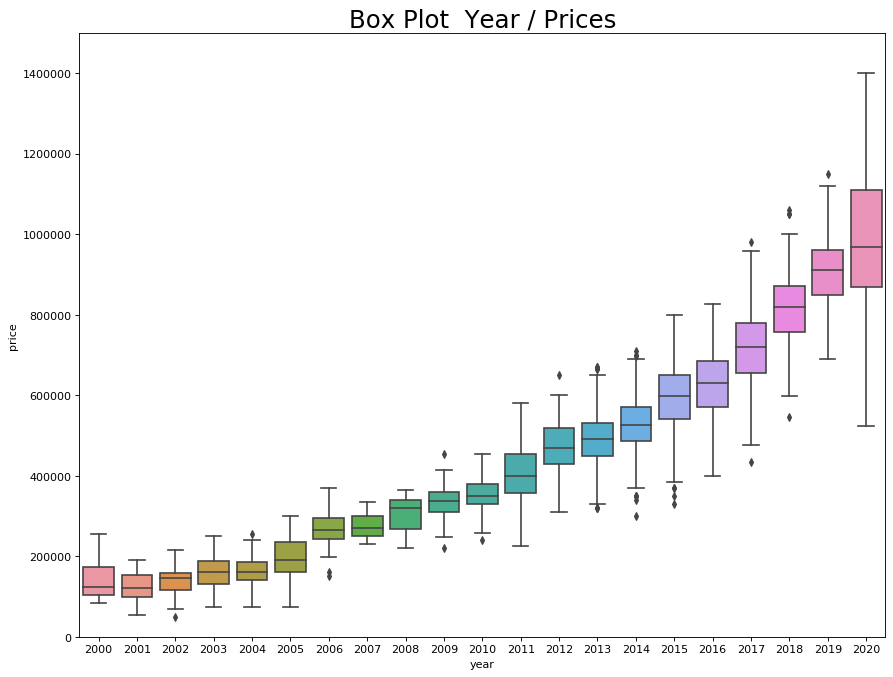

In [245]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [246]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

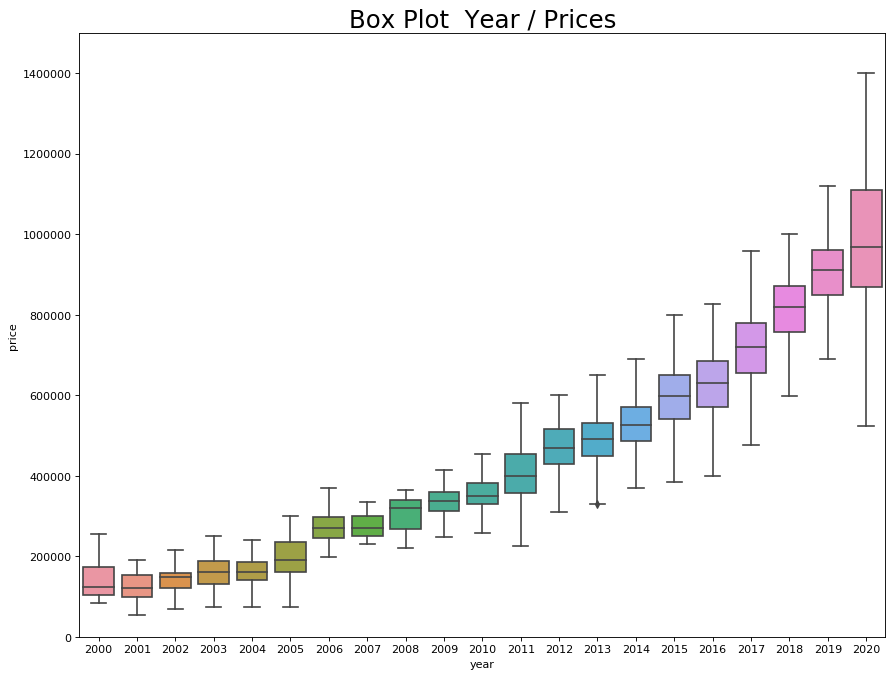

In [247]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

# Алгоритм CatBoost

In [249]:
X = df.drop(['price'], axis=1)
y = df['price']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 189144.3331789	total: 3.84ms	remaining: 3.07s
1:	learn: 184808.3814531	total: 7.06ms	remaining: 2.82s
2:	learn: 180452.6824687	total: 10.8ms	remaining: 2.87s
3:	learn: 176236.1363906	total: 12.9ms	remaining: 2.57s
4:	learn: 172267.4693978	total: 15.6ms	remaining: 2.47s
5:	learn: 168256.9463135	total: 18.1ms	remaining: 2.4s
6:	learn: 164610.5303546	total: 21.3ms	remaining: 2.41s
7:	learn: 161052.9015638	total: 24.5ms	remaining: 2.42s
8:	learn: 157629.4424313	total: 27.2ms	remaining: 2.39s
9:	learn: 154172.9281418	total: 29.8ms	remaining: 2.35s
10:	learn: 150948.8373861	total: 32.8ms	remaining: 2.35s
11:	learn: 147711.5816274	total: 35.8ms	remaining: 2.35s
12:	learn: 144535.1325256	total: 38.4ms	remaining: 2.32s
13:	learn: 141487.0392373	total: 41ms	remaining: 2.3s
14:	learn: 138591.3836920	total: 44ms	remaining: 2.3s
15:	learn: 135772.5858997	total: 45.9ms	remaining: 2.25s
16:	learn: 133111.5951517	total: 48.9ms	remaining: 2.25s
17:	learn: 130455.4963049	total: 52.3ms	remainin

166:	learn: 53854.8533471	total: 499ms	remaining: 1.89s
167:	learn: 53809.0934636	total: 502ms	remaining: 1.89s
168:	learn: 53766.2055178	total: 507ms	remaining: 1.89s
169:	learn: 53751.5071317	total: 510ms	remaining: 1.89s
170:	learn: 53735.6446392	total: 514ms	remaining: 1.89s
171:	learn: 53713.3918970	total: 519ms	remaining: 1.9s
172:	learn: 53686.8703227	total: 524ms	remaining: 1.9s
173:	learn: 53650.6642822	total: 527ms	remaining: 1.9s
174:	learn: 53620.4963942	total: 528ms	remaining: 1.89s
175:	learn: 53584.8033331	total: 531ms	remaining: 1.88s
176:	learn: 53561.5908001	total: 535ms	remaining: 1.88s
177:	learn: 53547.9621209	total: 537ms	remaining: 1.88s
178:	learn: 53522.1650946	total: 540ms	remaining: 1.87s
179:	learn: 53492.5097741	total: 542ms	remaining: 1.87s
180:	learn: 53466.5353371	total: 545ms	remaining: 1.86s
181:	learn: 53450.8221370	total: 549ms	remaining: 1.86s
182:	learn: 53422.9739856	total: 551ms	remaining: 1.86s
183:	learn: 53413.4683202	total: 553ms	remaining: 1

348:	learn: 51537.2313116	total: 995ms	remaining: 1.28s
349:	learn: 51527.3907459	total: 998ms	remaining: 1.28s
350:	learn: 51522.2195908	total: 1s	remaining: 1.28s
351:	learn: 51521.0304349	total: 1s	remaining: 1.28s
352:	learn: 51510.8950751	total: 1.01s	remaining: 1.27s
353:	learn: 51507.9864087	total: 1.01s	remaining: 1.27s
354:	learn: 51496.3955071	total: 1.01s	remaining: 1.27s
355:	learn: 51493.2198590	total: 1.01s	remaining: 1.26s
356:	learn: 51487.3346614	total: 1.02s	remaining: 1.26s
357:	learn: 51478.9764024	total: 1.02s	remaining: 1.26s
358:	learn: 51472.0827117	total: 1.02s	remaining: 1.26s
359:	learn: 51468.1469641	total: 1.03s	remaining: 1.25s
360:	learn: 51458.5625105	total: 1.03s	remaining: 1.25s
361:	learn: 51450.8301641	total: 1.03s	remaining: 1.25s
362:	learn: 51449.8330807	total: 1.04s	remaining: 1.25s
363:	learn: 51445.9085358	total: 1.04s	remaining: 1.25s
364:	learn: 51436.0602372	total: 1.04s	remaining: 1.24s
365:	learn: 51432.9976321	total: 1.04s	remaining: 1.24

528:	learn: 50649.1474494	total: 1.49s	remaining: 763ms
529:	learn: 50648.3925726	total: 1.49s	remaining: 760ms
530:	learn: 50647.2922657	total: 1.49s	remaining: 757ms
531:	learn: 50646.8127230	total: 1.5s	remaining: 754ms
532:	learn: 50643.4392868	total: 1.5s	remaining: 751ms
533:	learn: 50633.7903194	total: 1.5s	remaining: 748ms
534:	learn: 50631.2362286	total: 1.5s	remaining: 744ms
535:	learn: 50629.0575916	total: 1.5s	remaining: 742ms
536:	learn: 50625.4634042	total: 1.51s	remaining: 739ms
537:	learn: 50621.3082423	total: 1.51s	remaining: 736ms
538:	learn: 50615.1539507	total: 1.51s	remaining: 733ms
539:	learn: 50614.3628861	total: 1.52s	remaining: 730ms
540:	learn: 50611.7104722	total: 1.52s	remaining: 728ms
541:	learn: 50607.8732253	total: 1.52s	remaining: 725ms
542:	learn: 50604.8539694	total: 1.53s	remaining: 723ms
543:	learn: 50598.2799621	total: 1.53s	remaining: 720ms
544:	learn: 50595.6664265	total: 1.53s	remaining: 718ms
545:	learn: 50593.8128039	total: 1.54s	remaining: 715

715:	learn: 50093.3850668	total: 1.99s	remaining: 233ms
716:	learn: 50092.5152413	total: 1.99s	remaining: 230ms
717:	learn: 50089.7021767	total: 1.99s	remaining: 228ms
718:	learn: 50084.9961598	total: 2s	remaining: 225ms
719:	learn: 50081.4640438	total: 2s	remaining: 222ms
720:	learn: 50079.5654766	total: 2s	remaining: 220ms
721:	learn: 50072.5375917	total: 2.01s	remaining: 217ms
722:	learn: 50072.1913793	total: 2.01s	remaining: 214ms
723:	learn: 50070.5219180	total: 2.01s	remaining: 211ms
724:	learn: 50069.8483005	total: 2.01s	remaining: 208ms
725:	learn: 50063.1904945	total: 2.02s	remaining: 206ms
726:	learn: 50061.3956499	total: 2.02s	remaining: 203ms
727:	learn: 50058.2043174	total: 2.02s	remaining: 200ms
728:	learn: 50058.1575067	total: 2.02s	remaining: 197ms
729:	learn: 50052.0745099	total: 2.02s	remaining: 194ms
730:	learn: 50049.0624950	total: 2.03s	remaining: 191ms
731:	learn: 50046.7830751	total: 2.03s	remaining: 189ms
732:	learn: 50041.2327808	total: 2.03s	remaining: 186ms
7

In [251]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=4)

In [252]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 189144.3331789	total: 4.2ms	remaining: 3.36s
1:	learn: 184808.3814531	total: 8.57ms	remaining: 3.42s
2:	learn: 180452.6824687	total: 12.8ms	remaining: 3.4s
3:	learn: 176236.1363906	total: 15.3ms	remaining: 3.04s
4:	learn: 172267.4693978	total: 18.2ms	remaining: 2.9s
5:	learn: 168256.9463135	total: 21.2ms	remaining: 2.81s
6:	learn: 164610.5303546	total: 25ms	remaining: 2.84s
7:	learn: 161052.9015638	total: 28.9ms	remaining: 2.86s
8:	learn: 157629.4424313	total: 32ms	remaining: 2.81s
9:	learn: 154172.9281418	total: 35.3ms	remaining: 2.79s
10:	learn: 150948.8373861	total: 39.2ms	remaining: 2.81s
11:	learn: 147711.5816274	total: 43.6ms	remaining: 2.86s
12:	learn: 144535.1325256	total: 47.2ms	remaining: 2.86s
13:	learn: 141487.0392373	total: 50.8ms	remaining: 2.85s
14:	learn: 138591.3836920	total: 55ms	remaining: 2.88s
15:	learn: 135772.5858997	total: 57.4ms	remaining: 2.81s
16:	learn: 133111.5951517	total: 61.2ms	remaining: 2.82s
17:	learn: 130455.4963049	total: 66.2ms	remaining:

171:	learn: 53713.3918970	total: 509ms	remaining: 1.86s
172:	learn: 53686.8703227	total: 512ms	remaining: 1.85s
173:	learn: 53650.6642822	total: 515ms	remaining: 1.85s
174:	learn: 53620.4963942	total: 516ms	remaining: 1.84s
175:	learn: 53584.8033331	total: 520ms	remaining: 1.84s
176:	learn: 53561.5908001	total: 523ms	remaining: 1.84s
177:	learn: 53547.9621209	total: 525ms	remaining: 1.84s
178:	learn: 53522.1650946	total: 529ms	remaining: 1.84s
179:	learn: 53492.5097741	total: 533ms	remaining: 1.83s
180:	learn: 53466.5353371	total: 536ms	remaining: 1.83s
181:	learn: 53450.8221370	total: 538ms	remaining: 1.83s
182:	learn: 53422.9739856	total: 541ms	remaining: 1.82s
183:	learn: 53413.4683202	total: 542ms	remaining: 1.82s
184:	learn: 53386.1947457	total: 545ms	remaining: 1.81s
185:	learn: 53363.4749824	total: 546ms	remaining: 1.8s
186:	learn: 53344.7737807	total: 548ms	remaining: 1.8s
187:	learn: 53326.2869632	total: 550ms	remaining: 1.79s
188:	learn: 53299.7226002	total: 553ms	remaining: 

378:	learn: 51357.6854146	total: 1.01s	remaining: 1.12s
379:	learn: 51346.4414310	total: 1.01s	remaining: 1.11s
380:	learn: 51338.4731391	total: 1.01s	remaining: 1.11s
381:	learn: 51332.3747084	total: 1.01s	remaining: 1.11s
382:	learn: 51327.2822942	total: 1.02s	remaining: 1.11s
383:	learn: 51318.6627508	total: 1.02s	remaining: 1.11s
384:	learn: 51312.9246212	total: 1.02s	remaining: 1.1s
385:	learn: 51309.6227540	total: 1.03s	remaining: 1.1s
386:	learn: 51304.6883701	total: 1.03s	remaining: 1.1s
387:	learn: 51300.2843084	total: 1.03s	remaining: 1.09s
388:	learn: 51294.6860054	total: 1.03s	remaining: 1.09s
389:	learn: 51279.8648231	total: 1.04s	remaining: 1.09s
390:	learn: 51277.1745760	total: 1.04s	remaining: 1.09s
391:	learn: 51275.1740691	total: 1.04s	remaining: 1.08s
392:	learn: 51271.7031060	total: 1.04s	remaining: 1.08s
393:	learn: 51270.0660875	total: 1.04s	remaining: 1.07s
394:	learn: 51267.3631376	total: 1.05s	remaining: 1.07s
395:	learn: 51266.4042187	total: 1.05s	remaining: 1

576:	learn: 50512.2237093	total: 1.5s	remaining: 581ms
577:	learn: 50505.6623172	total: 1.51s	remaining: 579ms
578:	learn: 50505.1736792	total: 1.51s	remaining: 576ms
579:	learn: 50504.1652665	total: 1.51s	remaining: 574ms
580:	learn: 50498.3214241	total: 1.52s	remaining: 572ms
581:	learn: 50495.8204253	total: 1.52s	remaining: 569ms
582:	learn: 50494.8180295	total: 1.52s	remaining: 567ms
583:	learn: 50492.1308616	total: 1.53s	remaining: 565ms
584:	learn: 50491.0385175	total: 1.53s	remaining: 563ms
585:	learn: 50486.3568684	total: 1.53s	remaining: 560ms
586:	learn: 50482.8796968	total: 1.54s	remaining: 557ms
587:	learn: 50478.3633480	total: 1.54s	remaining: 555ms
588:	learn: 50470.6069445	total: 1.54s	remaining: 552ms
589:	learn: 50467.0112560	total: 1.54s	remaining: 550ms
590:	learn: 50462.6714917	total: 1.55s	remaining: 547ms
591:	learn: 50460.1079563	total: 1.55s	remaining: 545ms
592:	learn: 50457.0956659	total: 1.55s	remaining: 542ms
593:	learn: 50453.4885505	total: 1.55s	remaining:

758:	learn: 49973.5685672	total: 2s	remaining: 108ms
759:	learn: 49972.2992225	total: 2s	remaining: 106ms
760:	learn: 49969.1142536	total: 2.01s	remaining: 103ms
761:	learn: 49968.7414444	total: 2.01s	remaining: 100ms
762:	learn: 49965.3458322	total: 2.01s	remaining: 97.6ms
763:	learn: 49964.2882376	total: 2.01s	remaining: 94.9ms
764:	learn: 49960.4838063	total: 2.02s	remaining: 92.3ms
765:	learn: 49954.7680958	total: 2.02s	remaining: 89.7ms
766:	learn: 49954.2023518	total: 2.02s	remaining: 87ms
767:	learn: 49953.2783089	total: 2.03s	remaining: 84.4ms
768:	learn: 49952.6549336	total: 2.03s	remaining: 81.8ms
769:	learn: 49949.2795153	total: 2.03s	remaining: 79.2ms
770:	learn: 49948.4384765	total: 2.04s	remaining: 76.6ms
771:	learn: 49946.0883527	total: 2.04s	remaining: 73.9ms
772:	learn: 49945.7095397	total: 2.04s	remaining: 71.3ms
773:	learn: 49942.1034083	total: 2.04s	remaining: 68.6ms
774:	learn: 49940.9506077	total: 2.04s	remaining: 65.9ms
775:	learn: 49939.6745346	total: 2.05s	rema

In [253]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [254]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 52146.025785


### посмотрим для интереса стоимость моего автомобиля

In [255]:
# создадим фрейм с параметрами автомобиля

my_df = pd.DataFrame({'model': ['Kia Rio III Рестайлинг'], 'year': [2015], 'km_age': [68000],
                      'body_type': ['седан'], 'engine_power': [123],
                     'transmission': ['автоматическая'], 'owners_count': ['1 владелец']})

In [256]:
my_df

,model,year,km_age,body_type,engine_power,transmission,owners_count
0,Kia Rio III Рестайлинг,2015,68000,седан,123,автоматическая,1 владелец


In [257]:
# Получаем предсказание

my_preds = model.predict(my_df)

In [258]:
my_preds

array([669167.24974777])

### итак, мы получили цену 669167 рублей.
### для сравнения нашего предсказания обратимся к сайту robasta.ru, где за 99 рублей можно получить цену на авто

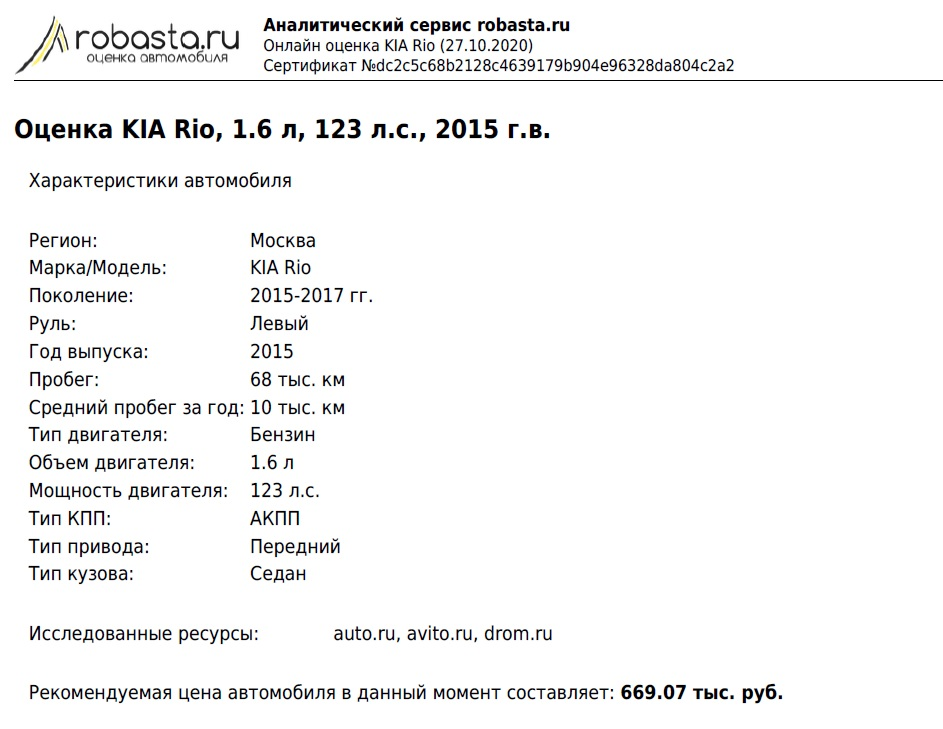

In [264]:
# Вот отчет с этого сайта

from IPython.display import Image
Image('C:\\Users\\user1174\\Downloads\\AutoRU_project\\robasta_kia.jpg')

### Мы получили отличный результат!